# **The Statistical Home Advantage: An EDA on How Statistics Shift in the NBA**

This project investigates whether NBA teams and players show statistically significant differences in performance when playing at home versus away. Rather than assuming a home-court advantage, we use exploratory data analysis and statistical testing to determine **which specific metrics** meaningfully change based on venue.

The analysis focuses on comparing home and away distributions for key statistics, including:

- **Points**
- **Rebounds**
- **Assists**
- **Shooting efficiency**
- **Free throw attempts**
- **Plus/minus**

By identifying which factors shift significantly, and which remain consistent, we aim to quantify the true statistical impact of game location on both team-level and player-level performance.

---

## **Dataset Description**

This dataset contains detailed information about NBA games from the 2004 season up until the 2022 season. We will be focusing on two (2) key datasets namely:

- `games.csv` - A dataset of every game played from 2004-2022, containing detailed info about the stats of both the home and away teams.
- `games_details.csv` - A dataset of every game played from 2004-2022, detailing each player's stats for each of those games.

### **Dataset Collection:**
The dataset was obtained from kaggle [https://www.kaggle.com/datasets/nathanlauga/nba-games], which was collected from the original NBA [https://www.nba.com/stats] site.

### **Structure of the Data**  
* **Format**: Tabular data with game-level and player-level statistics across multiple CSV files.
* **Features**: Columns include game metadata, team performance metrics, player statistics, and game outcomes.

### **Description of Variables**

### **games.csv** - Game-Level Statistics
* **Unit of Analysis**: Each row represents a single NBA game, including each team's statistics.

| **Features/Variables** | **Description** |
|------------------------|-----------------|
| GAME_DATE_EST | Date when the game was played (Eastern Standard Time) |
| GAME_ID | Unique numeric identifier for each game |
| GAME_STATUS_TEXT | Status of the game (e.g., "Final", "Scheduled") |
| HOME_TEAM_ID | Unique identifier for the home team |
| VISITOR_TEAM_ID | Unique identifier for the visiting team |
| SEASON | NBA season year (e.g., 2016 for 2016-2017 season) |
| TEAM_ID_home | Home team ID (duplicate of HOME_TEAM_ID) |
| PTS_home | Total points scored by the home team |
| FG_PCT_home | Field goal percentage for the home team |
| FT_PCT_home | Free throw percentage for the home team |
| FG3_PCT_home | Three-point percentage for the home team |
| AST_home | Total assists by the home team |
| REB_home | Total rebounds by the home team |
| TEAM_ID_away | Away team ID (duplicate of VISITOR_TEAM_ID) |
| PTS_away | Total points scored by the away team |
| FG_PCT_away | Field goal percentage for the away team |
| FT_PCT_away | Free throw percentage for the away team |
| FG3_PCT_away | Three-point percentage for the away team |
| AST_away | Total assists by the away team |
| REB_away | Total rebounds by the away team |
| HOME_TEAM_WINS | Binary indicator (1 if home team won, 0 if away team won) |

## **games_details.csv** - Player-Level Statistics
* **Unit of Analysis**: Each row represents a player's performance in a specific game.

| **Features/Variables** | **Description** |
|------------------------|-----------------|
| GAME_ID | Unique identifier linking to the games.csv file |
| TEAM_ID | Unique identifier for the player's team |
| TEAM_ABBREVIATION | 3-letter team code (e.g., LAL, GSW, BOS) |
| TEAM_CITY | City location of the team |
| PLAYER_ID | Unique identifier for each player |
| PLAYER_NAME | Full name of the player |
| NICKNAME | Player's nickname (if available) |
| START_POSITION | Starting position (G=Guard, F=Forward, C=Center, empty=bench) |
| COMMENT | Game notes (Reason for the player not playing) |
| MIN | Minutes played in format "MM:SS" |
| FGM | Field goals made |
| FGA | Field goals attempted |
| FG_PCT | Field goal percentage (FGM/FGA) |
| FG3M | Three-point field goals made |
| FG3A | Three-point field goals attempted |
| FG3_PCT | Three-point percentage (FG3M/FG3A) |
| FTM | Free throws made |
| FTA | Free throws attempted |
| FT_PCT | Free throw percentage (FTM/FTA) |
| OREB | Offensive rebounds |
| DREB | Defensive rebounds |
| REB | Total rebounds (OREB + DREB) |
| AST | Assists |
| STL | Steals |
| BLK | Blocks |
| TO | Turnovers |
| PF | Personal fouls |
| PTS | Total points scored |
| PLUS_MINUS | Plus/minus statistic (team point differential while player is on court) |

---

## **1.0 Project Setup & Data Loading**

Import the following libraries first as they are necessary to perform data manipulations, analysis, and visualizations throughout this notebook:

- **pandas** (`pd`) - A data analysis library that offers flexible data structures (DataFrames) for cleaning, exploring, and manipulating structured/tabular data.

- **matplotlib.pyplot** (`plt`) - A plotting library for creating a wide range of visualizations to help us produce different types of graphs.

- **seaborn** (`sns`) - A statistical data visualization library built on top of matplotlib that provides a high-level interface for creating attractive and informative graphics, including heatmaps, histograms, and regression plots.

- **numpy** (`np`) - A library for numerical computing in Python that provides support for arrays, mathematical operations, and efficient computation, often used for data manipulation and calculations.

- **scipy.stats** (`stats`) - A module within SciPy that provides a wide range of statistical functions and tests, such as t-tests, chi-square tests, and probability distributions, which are essential for hypothesis testing and statistical analysis.


In [276]:
## Import the necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [277]:
## Setup the two colors used in bar charts to be uniform.
green = '#2E8B57'
red = '#CD5C5C'

### **Reading the Dataset**
Load the dataset, which is a CSV file, as a pandas dataframe using the `read_csv()` function and assign it to a variable for further use.

In [278]:
## Turn csv files to data frames.
df_games = pd.read_csv('./Unclean Data/games.csv')
df_games_details = pd.read_csv('./Unclean Data/games_details.csv')

C:\Users\joshu\AppData\Local\Temp\ipykernel_8304\476213292.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_games_details = pd.read_csv('./Unclean Data/games_details.csv')


Use the `info()` function to check whether the variables referenced earlier align with the actual structure of the dataset. This function gives a summary of the DataFrame, showing the index range, total columns, column names, data types, and the number of non-null entries for each field.

In [279]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

In [280]:
df_games_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            668628 non-null  int64  
 1   TEAM_ID            668628 non-null  int64  
 2   TEAM_ABBREVIATION  668628 non-null  object 
 3   TEAM_CITY          668628 non-null  object 
 4   PLAYER_ID          668628 non-null  int64  
 5   PLAYER_NAME        668628 non-null  object 
 6   NICKNAME           53037 non-null   object 
 7   START_POSITION     255765 non-null  object 
 8   COMMENT            109689 non-null  object 
 9   MIN                558938 non-null  object 
 10  FGM                558938 non-null  float64
 11  FGA                558938 non-null  float64
 12  FG_PCT             558938 non-null  float64
 13  FG3M               558938 non-null  float64
 14  FG3A               558938 non-null  float64
 15  FG3_PCT            558938 non-null  float64
 16  FT

To give a preview of the dataset, the first 3 observations of the dataset will be displayed using `head()`

In [281]:
df_games.head(3)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1


In [282]:
df_games_details.head(3)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0


---

## **2.0. Data Cleaning**

### **2.1. Column Dropping**
Before data exploration and analysis, We would remove columns that are:

- Not needed for analysis

- Redundant metrics where simpler versions suffice

- Low-impact columns that don't directly address our home-court advantage research question

In [ ]:
## For df_games
## This column is not relevant to the EDA.
df_games = df_games.drop(columns=['GAME_STATUS_TEXT'])

## Duplicate columns
df_games = df_games.drop(columns=['TEAM_ID_home', 'TEAM_ID_away'])

## For df_games_details
## These columns are not relevant to the EDA.
df_games_details = df_games_details.drop(columns=['NICKNAME', 'START_POSITION', 'TEAM_CITY', 'COMMENT', 'MIN'])


cols1 = list(df_games.columns)
cols2 = list(df_games_details.columns)

print("df_games:", cols1)
print("\ndf_games_details:", cols2)

df_games: ['GAME_DATE_EST', 'GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS']

df_games_details: ['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'PLAYER_ID', 'PLAYER_NAME', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS']


### **2.2. Handling of Null Values**
Second, we will check both data frames for null values to assess data quality and determine the appropriate handling strategy for missing data.

In [284]:
## Null values in this case can be dropped.
df_games.isna().sum()

GAME_DATE_EST       0
GAME_ID             0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
PTS_home           99
FG_PCT_home        99
FT_PCT_home        99
FG3_PCT_home       99
AST_home           99
REB_home           99
PTS_away           99
FG_PCT_away        99
FT_PCT_away        99
FG3_PCT_away       99
AST_away           99
REB_away           99
HOME_TEAM_WINS      0
dtype: int64

For `df_games` we decided to drop the null values.

In [285]:
## Drop null values.
df_games = df_games.dropna()

## Double check if null values have been successfully dropped.
df_games.isna().sum()

GAME_DATE_EST      0
GAME_ID            0
HOME_TEAM_ID       0
VISITOR_TEAM_ID    0
SEASON             0
PTS_home           0
FG_PCT_home        0
FT_PCT_home        0
FG3_PCT_home       0
AST_home           0
REB_home           0
PTS_away           0
FG_PCT_away        0
FT_PCT_away        0
FG3_PCT_away       0
AST_away           0
REB_away           0
HOME_TEAM_WINS     0
dtype: int64

In [286]:
## Null values means the player didn't play in that game.
df_games_details.isna().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
PLAYER_ID                 0
PLAYER_NAME               0
FGM                  109690
FGA                  109690
FG_PCT               109690
FG3M                 109690
FG3A                 109690
FG3_PCT              109690
FTM                  109690
FTA                  109690
FT_PCT               109690
OREB                 109690
DREB                 109690
REB                  109690
AST                  109690
STL                  109690
BLK                  109690
TO                   109690
PF                   109690
PTS                  109690
PLUS_MINUS           133351
dtype: int64

Similarly for `df_games_details`, we also decided to drop null values because a null value indicates that a player didn't play that specific game.

In [287]:
## Drop null values.
df_games_details = df_games_details.dropna()

## Double check if null values have been successfully dropped.
df_games_details.isna().sum()

GAME_ID              0
TEAM_ID              0
TEAM_ABBREVIATION    0
PLAYER_ID            0
PLAYER_NAME          0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              0
FTM                  0
FTA                  0
FT_PCT               0
OREB                 0
DREB                 0
REB                  0
AST                  0
STL                  0
BLK                  0
TO                   0
PF                   0
PTS                  0
PLUS_MINUS           0
dtype: int64

### **2.3. Handling of Incorrect DataTypes**
Third step is to assess the data types of each data frame and decide whether some columns' data types need to be changed.

We can see that only `GAME_DATE_EST` has an object data type. This should be changed to `datetime64` so we can use functions such as `dt.month` and `dt.year` for our filtering.

In [288]:
## Check data types.
df_games.dtypes

GAME_DATE_EST       object
GAME_ID              int64
HOME_TEAM_ID         int64
VISITOR_TEAM_ID      int64
SEASON               int64
PTS_home           float64
FG_PCT_home        float64
FT_PCT_home        float64
FG3_PCT_home       float64
AST_home           float64
REB_home           float64
PTS_away           float64
FG_PCT_away        float64
FT_PCT_away        float64
FG3_PCT_away       float64
AST_away           float64
REB_away           float64
HOME_TEAM_WINS       int64
dtype: object

In [289]:
## Change object data types to a more specific data type.
## In this case only GAME_DATE_EST had an object data type.
df_games['GAME_DATE_EST'] = pd.to_datetime(df_games['GAME_DATE_EST'])
df_games.dtypes

GAME_DATE_EST      datetime64[ns]
GAME_ID                     int64
HOME_TEAM_ID                int64
VISITOR_TEAM_ID             int64
SEASON                      int64
PTS_home                  float64
FG_PCT_home               float64
FT_PCT_home               float64
FG3_PCT_home              float64
AST_home                  float64
REB_home                  float64
PTS_away                  float64
FG_PCT_away               float64
FT_PCT_away               float64
FG3_PCT_away              float64
AST_away                  float64
REB_away                  float64
HOME_TEAM_WINS              int64
dtype: object

Again, we can see that only `PLAYER_NAME` and `TEAM_ABBREVIATION` has an object data type. We will make sure that this is a `string` in the dataframe.


In [290]:
## Check data types.
df_games_details.dtypes

GAME_ID                int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
PLAYER_ID              int64
PLAYER_NAME           object
FGM                  float64
FGA                  float64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                  float64
FTA                  float64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                  float64
AST                  float64
STL                  float64
BLK                  float64
TO                   float64
PF                   float64
PTS                  float64
PLUS_MINUS           float64
dtype: object

In [291]:
## Change object data types to a more specific data type.
## Strings are still classified as objects in pandas.
df_games_details['TEAM_ABBREVIATION'] = df_games_details['TEAM_ABBREVIATION'].astype(str)
df_games_details['PLAYER_NAME'] = df_games_details['PLAYER_NAME'].astype(str)
df_games_details.dtypes

GAME_ID                int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
PLAYER_ID              int64
PLAYER_NAME           object
FGM                  float64
FGA                  float64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                  float64
FTA                  float64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                  float64
AST                  float64
STL                  float64
BLK                  float64
TO                   float64
PF                   float64
PTS                  float64
PLUS_MINUS           float64
dtype: object

### **2.3. Adding of Columns**

To analyze free throw attempts by home and away teams, we first need to compute the total **FTA per team per game** from the `df_games_details` dataset. Since the raw data stores player-level stats, we must aggregate them at the team level before merging them into `df_games`.

We use `groupby()` to group the dataset by `GAME_ID` and `TEAM_ID`, then apply `sum()` to total all player FTAs from the same team in the same game.

In [292]:
## First, aggregate FTA per team per game
team_fta_per_game = df_games_details.groupby(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION'])['FTA'].sum().reset_index()

## Create separate DataFrames for home and away
home_fta = team_fta_per_game.copy()
away_fta = team_fta_per_game.copy()

## Rename columns appropriately
home_fta.columns = ['GAME_ID', 'HOME_TEAM_ID', 'TEAM_ABBREVIATION_home', 'FTA_home']
away_fta.columns = ['GAME_ID', 'VISITOR_TEAM_ID', 'TEAM_ABBREVIATION_away', 'FTA_away']

## Merge both at once
df_games = df_games.merge(home_fta, on=['GAME_ID', 'HOME_TEAM_ID'], how='left')
df_games = df_games.merge(away_fta, on=['GAME_ID', 'VISITOR_TEAM_ID'], how='left')
df_games = df_games.dropna()

To determine whether each player was part of the **home or away team** and whether that player **won the game**, we need information that exists only in `df_games`. Therefore, we first extract the relevant columns and merge them into `df_games_details`.

We bring in `HOME_TEAM_ID`, `VISITOR_TEAM_ID`, and `HOME_TEAM_WINS` from `df_games` by merging on `GAME_ID`.

In [ ]:
## We would need to get certain columns from df_games and transfer them to df_games_details in order to derive the new columns.
## Select only the needed columns from df_games
df_player_details = df_games_details.merge(
    df_games[['GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'HOME_TEAM_WINS']],
    on='GAME_ID',
    how='left'
)

Now that the necessary game-level columns have been merged into `df_player_details`, we can derive two new indicators:

- Whether the player was on the **home team**  
- Whether the player's team **won the game**

After computing these, we remove the temporary columns used in the calculation.

In [ ]:
## Now that we have the needed columns, we will clean them up and turn them into only two columns.

## Identify home court advantage scenario
## - If HOME_TEAM_ID is same with a player's TEAM_ID, then player IS_HOME
## - Else player IS_HOME == FALSE / 0
df_player_details['IS_HOME'] = df_player_details['TEAM_ID'] == df_player_details['HOME_TEAM_ID']

## Determine if the player's team won the game
## - If player is HOME and home team won, then player WON
## - If player is AWAY and home team lost, then player WON
df_player_details['TEAM_WON'] = (
    (df_player_details['IS_HOME'] & (df_player_details['HOME_TEAM_WINS'] == 1)) |
    (~df_player_details['IS_HOME'] & (df_player_details['HOME_TEAM_WINS'] == 0))
)

## Drop the columns we used to get both these new columns
df_player_details = df_player_details.drop(columns=['HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'HOME_TEAM_WINS'])


---

## **3.0 Data and Statistical Analysis**

In this section, we perform a detailed **exploratory data analysis (EDA)** to uncover patterns in NBA performance metrics. We focus on comparing home and away games, examining both team-level and player-level statistics. The analysis will include:

- Visualizations, including bar charts, histograms, and heatmaps to highlight differences  
- Derived metrics to quantify the impact of playing at home  
- Player-level performance analysis to investigate how home-court advantage affects star players

**Approach summary**

`Home vs Away win rate`: A Chi-squared test is used to determine whether there is an association between the two categorical variables (HOME/AWAY and WIN/LOSS).

`Team-level analysis`: We'll use paired t-tests comparing each game's home-team metric vs away-team metric. These are paired because they come from the same game context (same opponents, same day, etc.), making paired tests more appropriate.

`Player-level analysis`: For individual players with sufficient sample size, we'll compute each qualified player's mean stat at home and mean stat away, then run a paired t-test across players. This tests whether players systematically perform differently at home versus on the road.

`Significance level`: We'll use α = 0.05 (standard 5% significance level). If p-value < 0.05, we reject the null hypothesis (no difference) and conclude there is statistically significant evidence of home-court advantage.

### **Functions Used**

The `create_bar_chart()` function is a reusable helper that simplifies the creation of bar charts. It takes numerical data and corresponding labels, applies consistent styling, and optionally adds value and percentage annotations.

In [296]:
## Function to setup the bar chart.
def create_bar_chart(data, labels, title, ylabel, value_format='{:.2f}', percentage_annotations=False, total_games=None):
    
    plt.figure(figsize=(8, 7))
    bars = plt.bar(labels, data, color=[green, red], edgecolor='black')
    
    ## Add value labels on top of bars
    for bar, value in zip(bars, data):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(data)*0.02, 
                 value_format.format(value), ha='center', va='bottom', fontweight='bold')
    
    ## Add percentage annotations inside bars IF specified
    if percentage_annotations and total_games:
        for i, (bar, value) in enumerate(zip(bars, data)):
            percentage = (value / total_games) * 100
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, 
                     f'{percentage:.1f}%', ha='center', va='center', 
                     fontsize=11, fontweight='bold', color='white')
    
    plt.ylabel(ylabel)
    plt.title(title, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

The `create_bar_chart_horizontal()` function is a reusable helper for creating **horizontal bar charts**, which are particularly useful when labels are long or when comparing many categories. The function automatically formats the bars, adds value labels, and allows optional custom colors.

In [297]:
## Function to create a HORIZONTAL bar chart
def create_bar_chart_horizontal(data, labels, title, xlabel, colors=None, value_format='{:.2f}'):
    
    if colors is None:
        colors = ['#2E8B57'] * len(data)
    
    plt.figure(figsize=(10, 8))
    bars = plt.barh(labels, data, color=colors, edgecolor='black', height=0.6)
    
    ## Add value labels
    for bar, value in zip(bars, data):
        plt.text(bar.get_width() + max(data)*0.01, bar.get_y() + bar.get_height()/2, 
                 value_format.format(value), ha='left', va='center', fontweight='bold')

    x_max = max(data)
    plt.xlim(0, x_max * 1.15)
    plt.xlabel(xlabel)
    plt.title(title, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

The function `perform_paired_ttest` is designed to statistically compare a performance metric between home and away teams on a per-game basis. It uses a **paired t-test** when the data are properly aligned.

In [346]:
## Function to perform paired t-test and print results
def perform_paired_ttest(home_data, away_data, metric_name):

    ## Convert to numpy arrays for statistical testing
    home_array = np.array(home_data)
    away_array = np.array(away_data)
    
    ## Check that we have the same number of observations
    if len(home_array) != len(away_array):
        print(f"Warning: Unequal sample sizes for {metric_name}")
        ## Use unpaired t-test if samples aren't paired properly
        t_stat, p_val = stats.ttest_ind(home_array, away_array, equal_var=False)
    else:
        ## Perform paired t-test
        t_stat, p_val = stats.ttest_rel(home_array, away_array)
    
    ## Print results
    print(f"\n=== {metric_name} ===")
    print(f"Home Mean: {home_array.mean():.3f}")
    print(f"Away Mean: {away_array.mean():.3f}")
    print(f"Mean Difference (Home - Away): {home_array.mean() - away_array.mean():.3f}")
    print(f"t-statistic: {t_stat:.3f}")
    print(f"p-value: {p_val:.6f}")
    
    ## Interpret significance
    if p_val < 0.05:
        print(f"Result: Statistically significant difference (p < 0.05)")
        if home_array.mean() > away_array.mean():
            print(f"Conclusion: Home teams have significantly higher {metric_name}")
        else:
            print(f"Conclusion: Away teams have significantly higher {metric_name}")
    else:
        print(f"Result: No statistically significant difference (p ≥ 0.05)")
        print(f"Conclusion: No evidence that home court affects {metric_name}")
    
    return t_stat, p_val

### **3.1. Home vs. Away: Team Performance**
For our first analysis, we'll quantify home-court advantage by comparing key team metrics across venues. We'll examine:
- Scoring & Efficiency: Points per game, field goal percentage, three-point percentage, free throw percentage
- Game Control: Rebounds, assists, plus/minus
- Referee influence: fouls called

### **3.1.1. Win Percentage Difference**

### `Question:` *Do home teams win more than away teams?*

To determine whether "Home Advantage" really exists, we'll first examine the most fundamental 
metric: win percentage. We'll calculate and visualize:

From the bar chart, we can see that **home teams win more often than away teams**.  

- Out of all games in the dataset, home teams won **58.9%** of the time.  
- Away teams, therefore, won the remaining **41.1%**.  


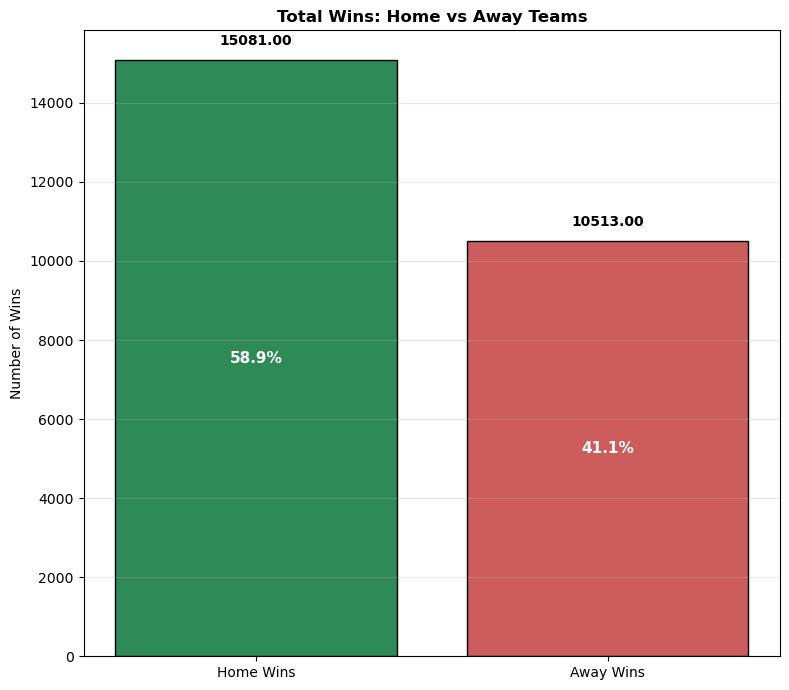

In [299]:
## For wins comparison
home_wins = df_games['HOME_TEAM_WINS'].sum()
away_wins = (df_games['HOME_TEAM_WINS'] == 0).sum()

create_bar_chart(
    data=[home_wins, away_wins],
    labels=['Home Wins', 'Away Wins'],
    title='Total Wins: Home vs Away Teams',
    ylabel='Number of Wins',
    percentage_annotations=True,
    total_games=len(df_games)
)

This heatmap visualizes the **win/loss outcomes for NBA games based on location** (home vs away). Each game is represented twice: once for the home team and once for the away team, capturing both perspectives. The contingency table counts the number of wins and losses for each location.

From the heatmap, we can observe that:

- **Home teams win more frequently than away teams**.
- Away teams have a higher count of losses compared to wins, reflecting the difficulty of winning on the road.  

This approach provides a summary of the distribution of game results by venue, allowing us to assess the effect of home-court advantage across the league.

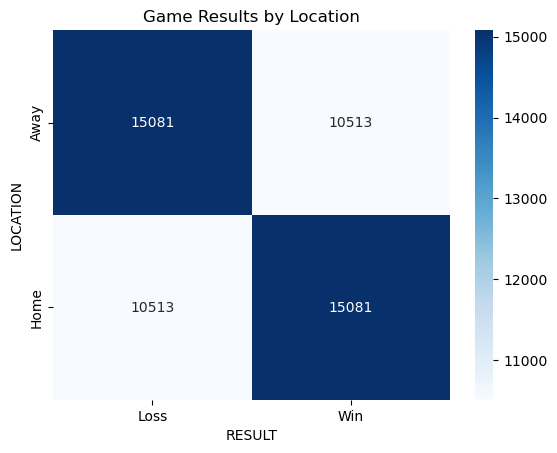

In [347]:
## Create empty list to store rows
results_rows = []

## For each game, add two rows: one for home team, one for away team
for each, row in df_games.iterrows():
    if row['HOME_TEAM_WINS'] == 1:
        results_rows.append({'LOCATION': 'Home', 'RESULT': 'Win'})  # Home wins
        results_rows.append({'LOCATION': 'Away', 'RESULT': 'Loss'})  # Away loses
    else:
        results_rows.append({'LOCATION': 'Home', 'RESULT': 'Loss'})  # Home loses  
        results_rows.append({'LOCATION': 'Away', 'RESULT': 'Win'})  # Away wins

df_results = pd.DataFrame(results_rows)

## Create contingency table
contingency = pd.crosstab(df_results['LOCATION'], df_results['RESULT'])

# Plot heatmap
sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues')
plt.title('Game Results by Location')
plt.show()

We would then perform a **chi-square test of independence** to determine whether the outcome of NBA games (win or loss) is associated with game location (home or away). 

**Steps:**
1. The contingency table counts **wins and losses for home and away teams**:
2. `stats.chi2_contingency` computes the **chi-square statistic**, **p-value**, **degrees of freedom**, and **expected frequencies**.
3. The **observed counts** differ substantially from the expected counts under the null hypothesis, indicating that **location influences the outcome**.

### `Conclusion:` *There is a **statistically significant difference** between home and away win rates.*

In [348]:
# Perform chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

print("Contingency Table:")
print(contingency)
print("\n" + "=" * 50)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.10f}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies (if no association):")
print(pd.DataFrame(expected, 
                   index=contingency.index, 
                   columns=contingency.columns))
print("\n" + "=" * 50)

# Interpretation
if p_value < 0.05:
    print("Conclusion: Home teams have significantly higher win rate than away teams.")
else:
    print("Conclusion: No evidence that home court affects win rate.")

Contingency Table:
RESULT     Loss    Win
LOCATION              
Away      15081  10513
Home      10513  15081

Chi-square statistic: 1629.8733
P-value: 0.0000000000
Degrees of freedom: 1

Expected frequencies (if no association):
RESULT       Loss      Win
LOCATION                  
Away      12797.0  12797.0
Home      12797.0  12797.0

Conclusion: Home teams have significantly higher win rate than away teams.


### **3.1.2. Scoring Difference**

### `Question:` *Do home teams score more than away teams?*

This bar chart compares the **average points scored per game** by home and away teams to evaluate the impact of home-court advantage on scoring.

From the bar chart, we observe that:

- **Home teams** score an average of **103.46 points per game**.  
- **Away teams** score an average of **100.64 points per game**.  

This shows that home teams score roughly **2.82 points more per game** than away teams.  

The difference, though not massive, is consistent across the dataset. 

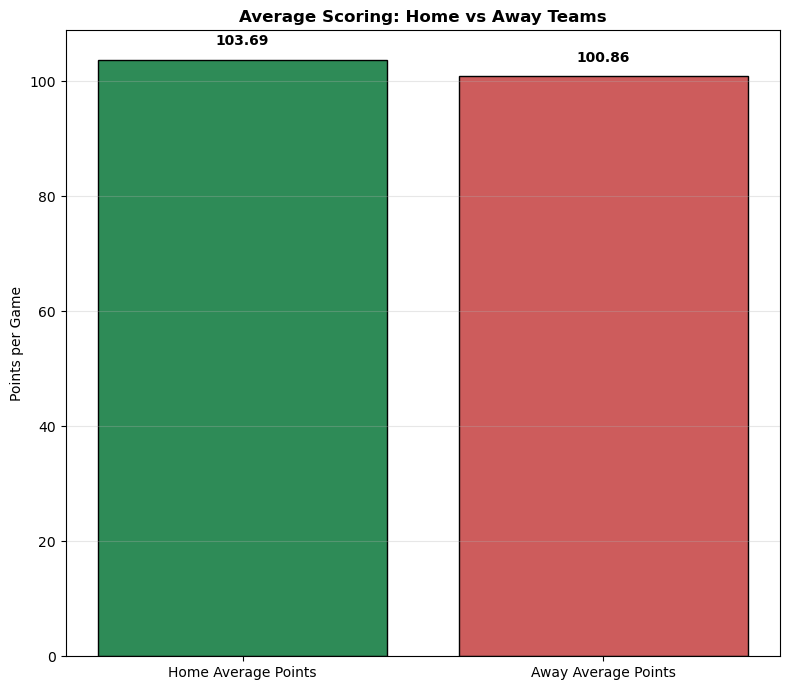

In [302]:
## Calculate avg points
home_scoring = df_games['PTS_home'].mean()
away_scoring = df_games['PTS_away'].mean()

create_bar_chart(
    data=[home_scoring, away_scoring],
    labels=['Home Average Points', 'Away Average Points'],
    title='Average Scoring: Home vs Away Teams',
    ylabel='Points per Game',
    value_format='{:.2f}'
)

This bar chart compares the **average points scored per game** by home and away teams grouped by teams to evaluate the impact of home-court advantage on scoring.

From the horizontal bar chart, we can observe that:

- Nearly every team scores **more points at home than away**.
- On average, the home scoring across all teams is higher than the away scoring, though the **magnitude of the difference varies by team**:  
  - Some teams, like NOP, show a 6-7 points difference.  
  - Other teams, like BKN, have a smaller gap, indicating they are relatively consistent regardless of venue ~~or maybe consistently bad~~.  

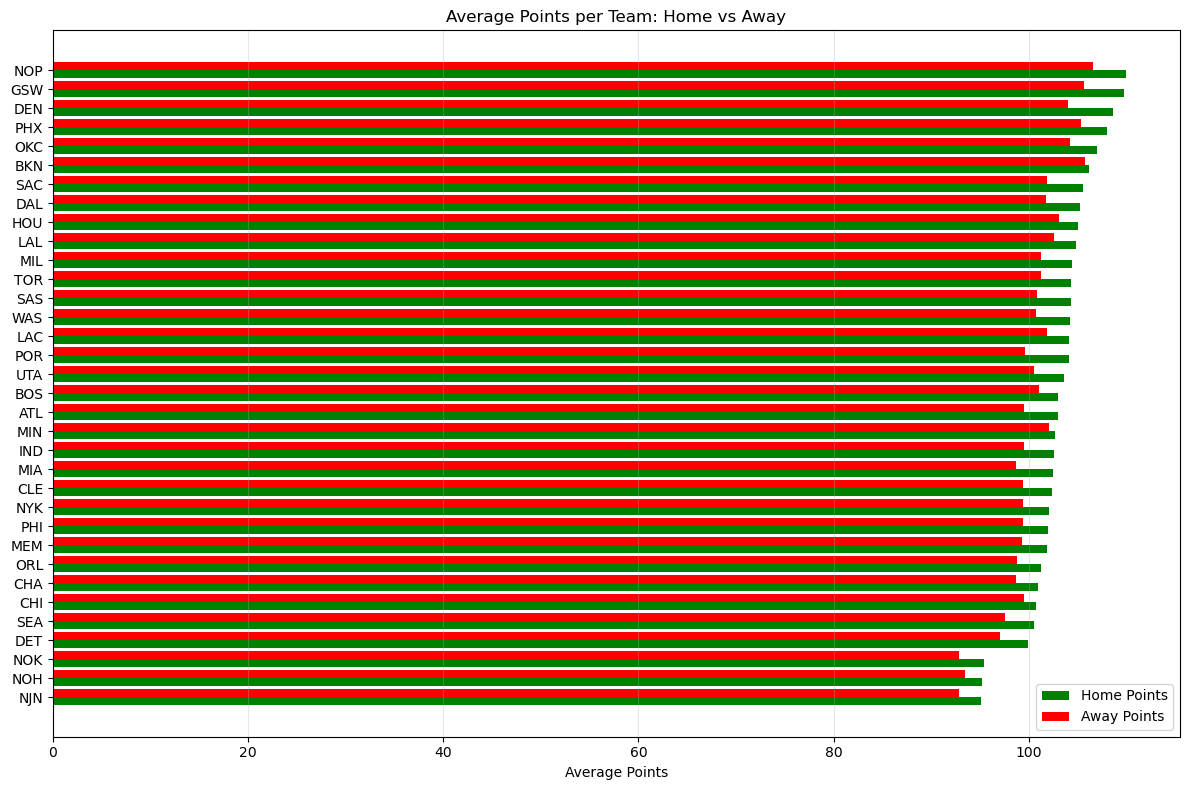

In [303]:
## Aggregate average points per team using abbreviations 
home_pts = df_games.groupby('TEAM_ABBREVIATION_home')['PTS_home'].mean().reset_index() 
away_pts = df_games.groupby('TEAM_ABBREVIATION_away')['PTS_away'].mean().reset_index() 

## Merge home and away averages by team abbreviation 
team_pts = home_pts.merge(away_pts, left_on='TEAM_ABBREVIATION_home', right_on='TEAM_ABBREVIATION_away') 
team_pts = team_pts.rename(columns={ 'TEAM_ABBREVIATION_home':'Team', 'PTS_home':'Avg_PTS_Home', 'PTS_away':'Avg_PTS_Away' })

## Sort by home points
team_pts = team_pts.sort_values('Avg_PTS_Home', ascending=True)

## Number of teams
n_teams = len(team_pts)
y = np.arange(n_teams)
width = 0.4

plt.figure(figsize=(12,8))
plt.barh(y - width/2, team_pts['Avg_PTS_Home'], height=width, label='Home Points', color='green')
plt.barh(y + width/2, team_pts['Avg_PTS_Away'], height=width, label='Away Points', color='red')
plt.yticks(y, team_pts['Team'])
plt.xlabel('Average Points')
plt.title('Average Points per Team: Home vs Away')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()



### **Paired t-Test for Points Scored: Home vs Away**

After observing that home teams tend to score more points than away teams on average, we then perform a **paired t-test** to formally test whether this difference is statistically significant. By comparing the points scored by the same team in each game as the home team versus the away team, the paired t-test evaluates if the observed advantage is unlikely to have occurred by chance.  

The paired t-test is appropriate here because **each game involves the same two teams**, so the points are naturally paired (home vs away).

### `Conclusion:` *There is a **statistically significant difference** in points scored between home and away teams, with home teams scoring more on average.*


In [304]:
## Perform t-test for points scored
points_t_stat, points_p_val = perform_paired_ttest(
    home_data=df_games['PTS_home'],
    away_data=df_games['PTS_away'],
    metric_name="Points per Game"
)


=== Points per Game ===
Home Mean: 103.693
Away Mean: 100.860
Mean Difference (Home - Away): 2.833
t-statistic: 33.514
p-value: 0.000000
Result: Statistically significant difference (p < 0.05)
Conclusion: Home teams have significantly higher Points per Game


### **3.1.3. Assist Difference**

### `Question:` *Do home teams assist more than away teams?*

We then examine **average assists per game** to see if home-court advantage also affects team playmaking. By calculating the mean assists for home and away teams, we can compare how team collaboration changes based on game location.  

From the bar chart, we observe that **home teams average 22.82 assists per game**, while **away teams average 21.5 assists per game**. This indicates that teams tend to **assist slightly more when playing at home**.

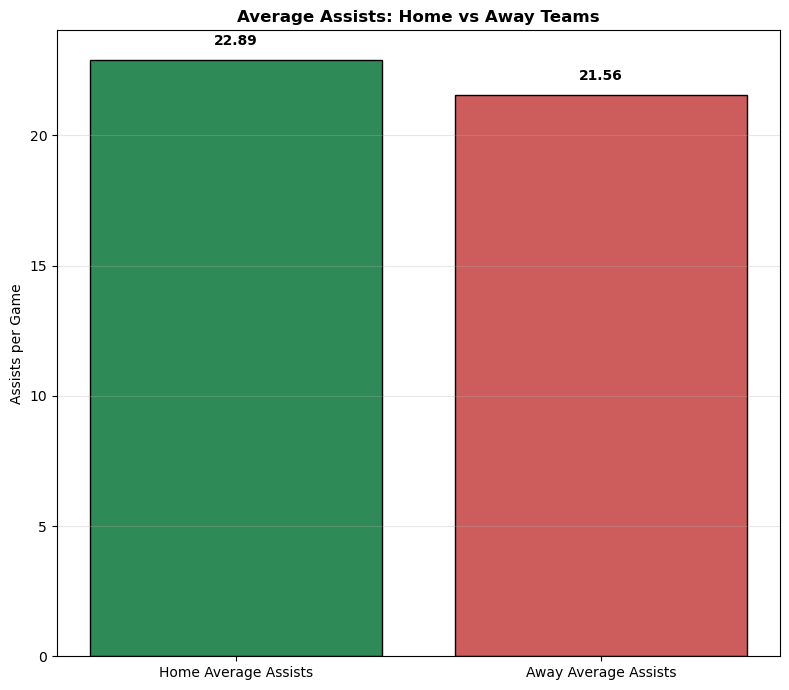

In [305]:
## Calculate assists
home_assists = df_games['AST_home'].mean()
away_assists = df_games['AST_away'].mean()

create_bar_chart(
    data=[home_assists, away_assists],
    labels=['Home Average Assists', 'Away Average Assists'],
    title='Average Assists: Home vs Away Teams',
    ylabel='Assists per Game',
    value_format='{:.2f}'
)

Next, we perform a **paired t-test** on team assists to determine whether the observed difference between home and away games is statistically significant. By comparing the number of assists for each team in the same game as the home team versus the away team, the test evaluates whether home teams truly assist more consistently or if the observed difference could occur by chance.

### `Conclusion:` *The difference in assists per game is **statistically significant**, indicating that home teams consistently make more assists than away teams.*


In [306]:
## Perform t-test for assists
ast_t_stat, ast_p_val = perform_paired_ttest(
    home_data=df_games['AST_home'],
    away_data=df_games['AST_away'],
    metric_name="Assists per Game"
)


=== Assists per Game ===
Home Mean: 22.887
Away Mean: 21.562
Mean Difference (Home - Away): 1.325
t-statistic: 31.260
p-value: 0.000000
Result: Statistically significant difference (p < 0.05)
Conclusion: Home teams have significantly higher Assists per Game


### **3.1.4. Rebound Difference**

### `Question:` *Do home teams rebound more than away teams?*

We then examine **average rebounds per game** to explore whether home-court advantage affects teams’ ability to secure possessions.  

The bar chart compares the mean rebounds for home and away teams:

- **Home teams average 43.37 rebounds per game**  
- **Away teams average 42.11 rebounds per game**  

This visualization allows us to see that home teams tend to collect slightly more rebounds than away teams, providing an initial view of possible home-court influence on rebounding.

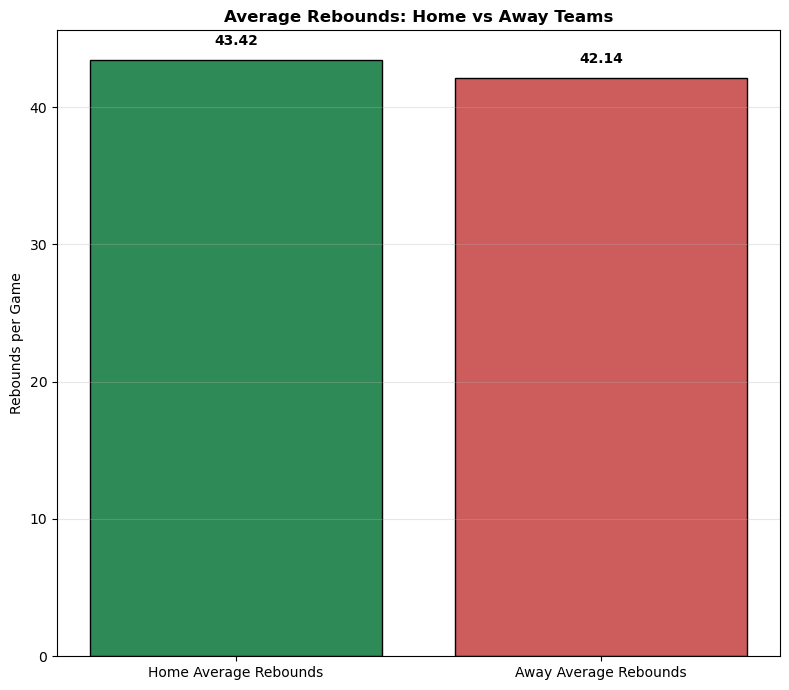

In [307]:
## Calculate avg rebounds
home_rebounds = df_games['REB_home'].mean()
away_rebounds = df_games['REB_away'].mean()

create_bar_chart(
    data=[home_rebounds, away_rebounds],
    labels=['Home Average Rebounds', 'Away Average Rebounds'],
    title='Average Rebounds: Home vs Away Teams',
    ylabel='Rebounds per Game',
    value_format='{:.2f}'
)

After observing that home teams tend to grab slightly more rebounds than away teams (43.37 vs 42.11 per game), we perform a **paired t-test** to determine if this difference is statistically significant. By comparing rebounds for each team in the same game as home versus away, the test accounts for natural pairing in the data.

### `Conclusion:` *The difference in rebounds per game is **statistically significant**, indicating that home teams consistently secure more rebounds than away teams.*


In [308]:
## Perform t-test for rebounds
reb_t_stat, reb_p_val = perform_paired_ttest(
    home_data=df_games['REB_home'],
    away_data=df_games['REB_away'],
    metric_name="Rebounds per Game"
)


=== Rebounds per Game ===
Home Mean: 43.418
Away Mean: 42.141
Mean Difference (Home - Away): 1.278
t-statistic: 22.735
p-value: 0.000000
Result: Statistically significant difference (p < 0.05)
Conclusion: Home teams have significantly higher Rebounds per Game


### **3.1.5. Free Throw Attempts Difference**

### `Question:` *Do home teams attempt more free throws than away teams?*

A crucial part of the game often discussed among NBA fans is **referee bias**. Many believe that home teams receive more favorable calls, leading to increased free throw attempts (FTA). This perception suggests that officials may be subconsciously influenced by the home crowd, especially during close or high-pressure moments.

In this section, we examine whether this belief holds true by analyzing the differences in **average free throw attempts** between home and away teams. By comparing their FTA averages, we can determine if home teams truly get an officiating advantage at the line.


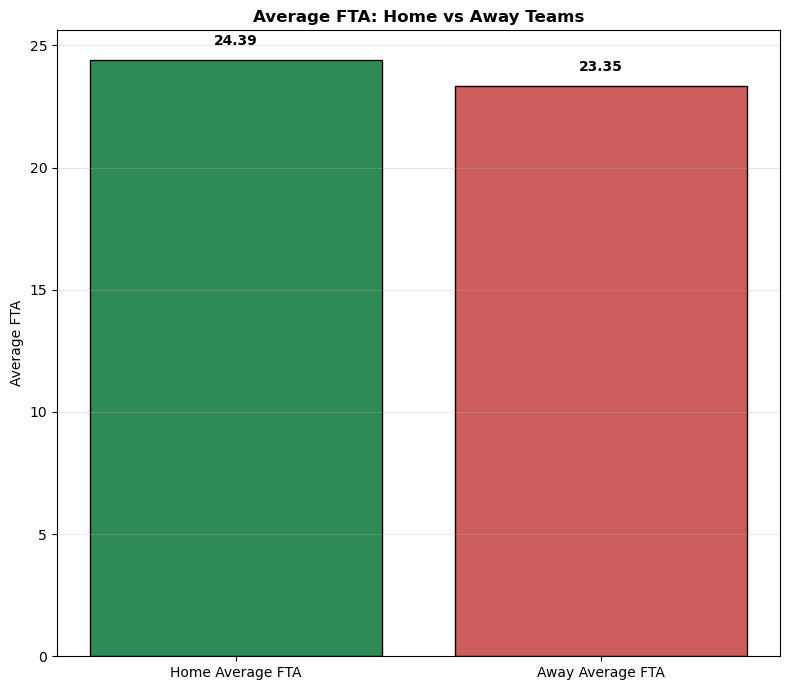

In [309]:
## Calculate avg FTA
home_fta = df_games['FTA_home'].mean()
away_fta = df_games['FTA_away'].mean()

create_bar_chart(
    data=[home_fta, away_fta],
    labels=['Home Average FTA', 'Away Average FTA'],
    title='Average FTA: Home vs Away Teams',
    ylabel='Average FTA',
    value_format='{:.2f}'
)

To further investigate whether home teams benefit from officiating tendencies, we conducted a paired t-test comparing **Free Throw Attempts (FTA)** between home and away teams. After filtering out games with missing FTA values, we analyzed only the matchups where both teams had complete data.

The results show that home teams averaged **24.39 FTA**, compared to **23.35 FTA** for away teams, a difference of about **1.05 attempts per game**. The t-test yielded a **t-statistic of 17.70** with a **p-value < 0.001**, indicating a statistically significant difference.

### `Conclusion:` *The difference in free throw attempts per game is **statistically significant**, indicating that home teams consistently get more free throw attempts than away teams.*

In [310]:
## Perform t-test for free throw attempts
## Note: We need to handle NaN values first
fta_home_clean = df_games['FTA_home'].dropna()
fta_away_clean = df_games['FTA_away'].dropna()

## Since FTA_home and FTA_away might have different NaN patterns,
## we need to align them properly for a paired test
## Let's get the common GAME_IDs with non-NaN values for both
valid_fta_games = df_games.dropna(subset=['FTA_home', 'FTA_away'])

fta_t_stat, fta_p_val = perform_paired_ttest(
    home_data=valid_fta_games['FTA_home'],
    away_data=valid_fta_games['FTA_away'],
    metric_name="Free Throw Attempts per Game"
)


=== Free Throw Attempts per Game ===
Home Mean: 24.394
Away Mean: 23.348
Mean Difference (Home - Away): 1.046
t-statistic: 17.700
p-value: 0.000000
Result: Statistically significant difference (p < 0.05)
Conclusion: Home teams have significantly higher Free Throw Attempts per Game


### **3.1.6. Field Goal Percentage Difference**

### `Question:` *Do home teams shoot more efficiently than away teams?*

Shooting efficiency is one of the most important indicators of a team’s offensive performance, and **Field Goal Percentage (FG%)** measures how effectively teams convert their shot attempts. Because factors such as crowd support, court familiarity, and shooting rhythm can influence performance, it’s often suggested that home teams may shoot more efficiently than their away counterparts.

In this section, we compare the **average FG%** of home and away teams to determine whether location impacts shooting efficiency. The data shows that home teams shoot an average of **46.07%**, while away teams average **44.97%**, suggesting a slight but visible advantage for teams playing on their home court.


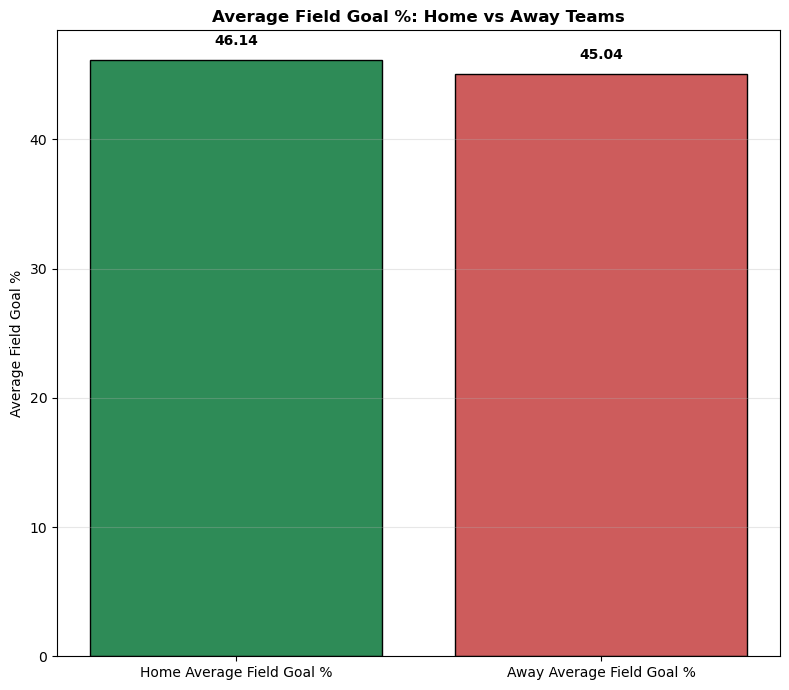

In [311]:
## Calculate avg FG%
home_fg_pct = df_games['FG_PCT_home'].mean() * 100
away_fg_pct = df_games['FG_PCT_away'].mean() * 100

create_bar_chart(
    data=[home_fg_pct, away_fg_pct],
    labels=['Home Average Field Goal %', 'Away Average Field Goal %'],
    title='Average Field Goal %: Home vs Away Teams',
    ylabel='Average Field Goal %',
    value_format='{:.2f}'
)

To determine whether the observed difference in shooting efficiency between home and away teams is meaningful, we performed a paired t-test on **Field Goal Percentage (FG%)**. This test evaluates whether home teams consistently shoot better than away teams across the same set of games.

The results show that home teams have an average FG% of **46.1%**, compared to **45.0%** for away teams, a difference of about **1.1 percentage points**. The t-test produced a **t-statistic of 23.08** with a **p-value < 0.001**, indicating strong statistical significance.

### `Conclusion:`  *The difference in field goal percentage is **statistically significant**, showing that home teams consistently shoot more efficiently than away teams.*


In [312]:
## Perform t-test for field goal percentage
fg_pct_t_stat, fg_pct_p_val = perform_paired_ttest(
    home_data=df_games['FG_PCT_home'],
    away_data=df_games['FG_PCT_away'],
    metric_name="Field Goal Percentage"
)


=== Field Goal Percentage ===
Home Mean: 0.461
Away Mean: 0.450
Mean Difference (Home - Away): 0.011
t-statistic: 22.591
p-value: 0.000000
Result: Statistically significant difference (p < 0.05)
Conclusion: Home teams have significantly higher Field Goal Percentage


### **3.1.7. Free Throw Percentage Difference**

### `Question:` *Do home teams shoot more efficiently at the free throw line than away teams?*

Free throw shooting is often considered one of the most consistent and least environment-dependent aspects of basketball. Unlike field goals, free throws involve no defenders and occur in a controlled setting. However, crowd pressure, fatigue, and psychological factors may still influence a player's performance at the line.

To explore whether playing at home impacts free throw efficiency, we compared the **average Free Throw Percentage (FT%)** of home and away teams.

Home teams recorded an average FT% of **76.04%**, while away teams averaged **75.88%**. Although the difference is small (about **0.16 percentage points**), visualizing this comparison helps us assess whether there is any noticeable home-court influence on free throw shooting.

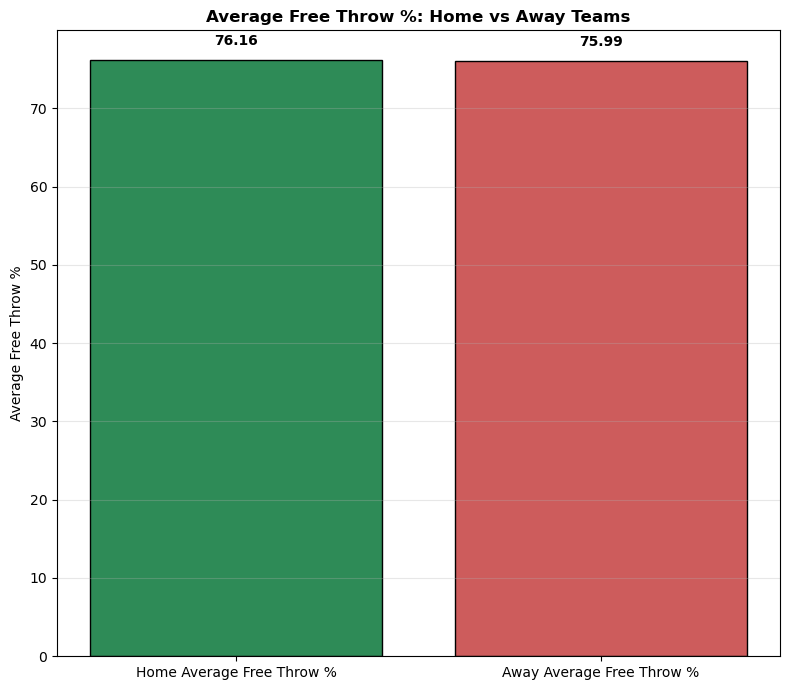

In [313]:
## Calculate avg FT%
home_ft_pct = df_games['FT_PCT_home'].mean() * 100
away_ft_pct = df_games['FT_PCT_away'].mean() * 100

create_bar_chart(
    data=[home_ft_pct, away_ft_pct],
    labels=['Home Average Free Throw %', 'Away Average Free Throw %'],
    title='Average Free Throw %: Home vs Away Teams',
    ylabel='Average Free Throw %',
    value_format='{:.2f}'
)

To examine whether the small difference in free throw efficiency between home and away teams is statistically meaningful, we performed a paired t-test on **Free Throw Percentage (FT%)**. This test evaluates whether playing at home consistently improves free throw performance.

The results show that home teams have an average FT% of **76.0%**, compared to **75.9%** for away teams, a minimal difference of **0.2 percentage points**. The t-test yielded a **t-statistic of 1.80** with a **p-value of 0.073**, indicating that this difference is not statistically significant.

### `Conclusion:` *There is no evidence that home court significantly affects free throw shooting performance.*


In [314]:
## Perform t-test for free throw percentage
ft_pct_t_stat, ft_pct_p_val = perform_paired_ttest(
    home_data=df_games['FT_PCT_home'],
    away_data=df_games['FT_PCT_away'],
    metric_name="Free Throw Percentage"
)


=== Free Throw Percentage ===
Home Mean: 0.762
Away Mean: 0.760
Mean Difference (Home - Away): 0.002
t-statistic: 1.826
p-value: 0.067852
Result: No statistically significant difference (p ≥ 0.05)
Conclusion: No evidence that home court affects Free Throw Percentage


### **3.1.8. Three Point Percentage Difference**

### `Question:` *Do home teams shoot threes more efficiently than away teams?*

Three-point shooting is a key component of modern basketball offense, and efficiency from beyond the arc can significantly impact game outcomes. While long-range shooting is often considered more challenging and subject to variability, factors like crowd noise and court familiarity may still influence performance.

In this section, we compare the **average Three-Point Percentage (3P%)** of home and away teams to assess potential home-court effects.

Home teams average **35.6%**, while away teams average **34.95%**, suggesting a small advantage for teams playing at home in long-range shooting.

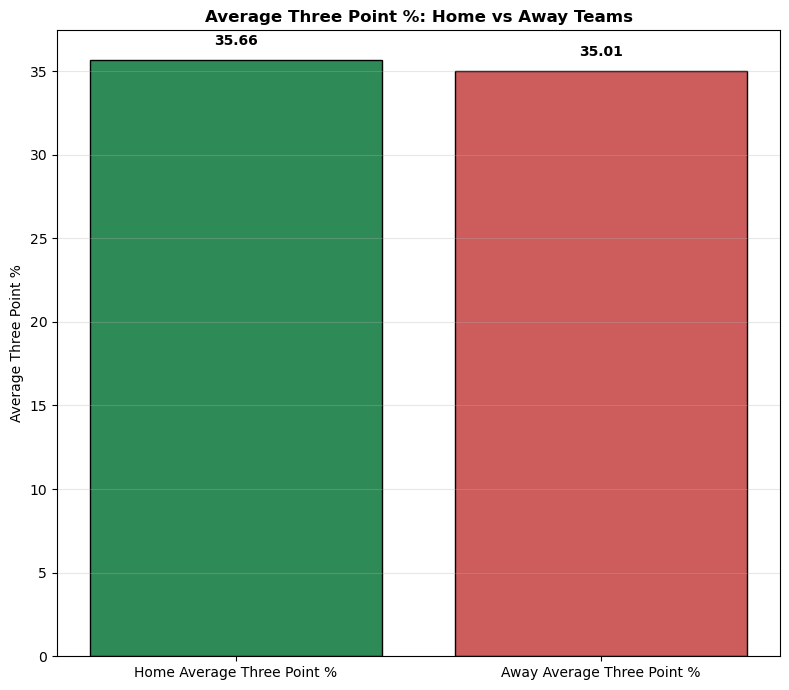

In [315]:
## Calculate avg 3FG%
home_3pt_pct = df_games['FG3_PCT_home'].mean() * 100
away_3pt_pct = df_games['FG3_PCT_away'].mean() * 100

create_bar_chart(
    data=[home_3pt_pct, away_3pt_pct],
    labels=['Home Average Three Point %', 'Away Average Three Point %'],
    title='Average Three Point %: Home vs Away Teams',
    ylabel='Average Three Point %',
    value_format='{:.2f}'
)

To determine whether the observed difference in three-point shooting between home and away teams is statistically significant, we performed a paired t-test on **Three-Point Percentage (3P%)**. This test evaluates whether playing at home consistently improves long-range shooting efficiency.

The results indicate that home teams have an average 3P% of **35.6%**, compared to **34.9%** for away teams, a difference of about **0.7 percentage points**. The t-test produced a **t-statistic of 6.82** with a **p-value < 0.001**, indicating a statistically significant difference.

### `Conclusion:`  *The difference in three-point shooting percentage is **statistically significant**, showing that home teams consistently make a slightly higher percentage of three-point shots than away teams.*


In [316]:
## Perform t-test for three-point percentage
fg3_pct_t_stat, fg3_pct_p_val = perform_paired_ttest(
    home_data=df_games['FG3_PCT_home'],
    away_data=df_games['FG3_PCT_away'],
    metric_name="Three-Point Percentage"
)


=== Three-Point Percentage ===
Home Mean: 0.357
Away Mean: 0.350
Mean Difference (Home - Away): 0.006
t-statistic: 6.690
p-value: 0.000000
Result: Statistically significant difference (p < 0.05)
Conclusion: Home teams have significantly higher Three-Point Percentage


### **3.2. Home vs Away: Player Peformance**

In [317]:
## Function that calculates the a specified stat difference of a player when in home vs away.
## This is calculated by subtracting the HOME stat from the AWAY stat or
## AWAY_STAT - HOME_STAT
## This would mean that:
## - A negative value means the player has a higher HOME stat
## - A positive value means the player has a higher AWAY stat
def calculate_stat_differentials(player_df, stat_column, min_games=50, min_stat_value=None):

    ## Calculate home vs away averages for each player
    player_avgs = player_df.groupby(['PLAYER_NAME', 'IS_HOME']).agg({
        stat_column: 'mean',
        'GAME_ID': 'count'  ## Number of games played
    }).unstack()
    
    ## Calculate overall average for each player (for min_stat_value filtering)
    player_overall_avg = player_df.groupby('PLAYER_NAME')[stat_column].mean()
    
    ## Filter players with sufficient games
    game_counts = player_df.groupby('PLAYER_NAME').size()
    qualified_by_games = game_counts[game_counts >= min_games].index
    
    ## Additional filtering by minimum stat value if specified
    if min_stat_value is not None:
        qualified_by_stat = player_overall_avg[player_overall_avg >= min_stat_value].index
        qualified_players = qualified_by_games.intersection(qualified_by_stat)
    else:
        qualified_players = qualified_by_games
    
    ## Calculate stat differentials
    stat_diffs = []
    
    for player in qualified_players:
        home_stat = player_avgs.loc[player, (stat_column, True)]
        away_stat = player_avgs.loc[player, (stat_column, False)]
        stat_diff = away_stat - home_stat
            
        stat_diffs.append({
            'player': player,
            f'{stat_column.lower()}_diff': stat_diff,
            f'home_{stat_column.lower()}': home_stat,
            f'away_{stat_column.lower()}': away_stat,
            f'overall_{stat_column.lower()}': player_overall_avg[player],
            'total_games': game_counts[player]
        })
            
    
    return pd.DataFrame(stat_diffs)

### **3.2.1. Plus / Minus Difference**

In [318]:
## Get plus/minus differentials
pm_diffs = calculate_stat_differentials(df_player_details, 'PLUS_MINUS', min_games=100)

## Top 10 players with better plus/minus on the road (positive differential)
pm_top_10_away = pm_diffs[pm_diffs['plus_minus_diff'] > 0].sort_values('plus_minus_diff', ascending=False).head(10)

## Top 10 players with better plus/minus at home (negative differential)
pm_top_10_home = pm_diffs[pm_diffs['plus_minus_diff'] < 0].sort_values('plus_minus_diff').head(10)

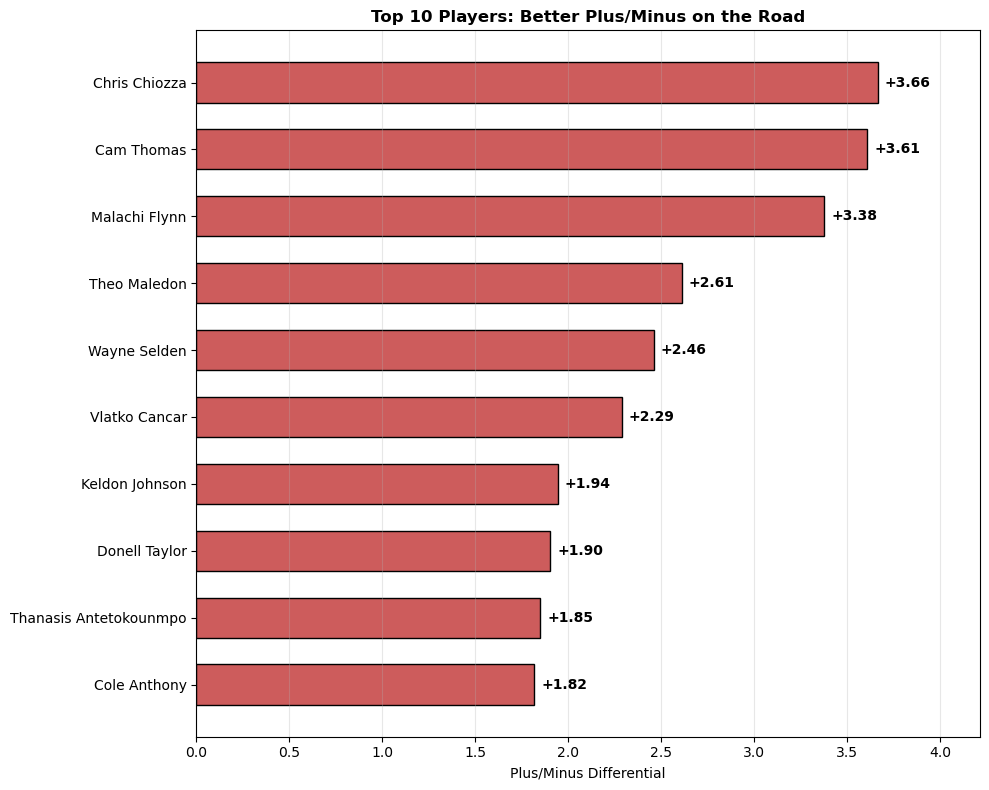

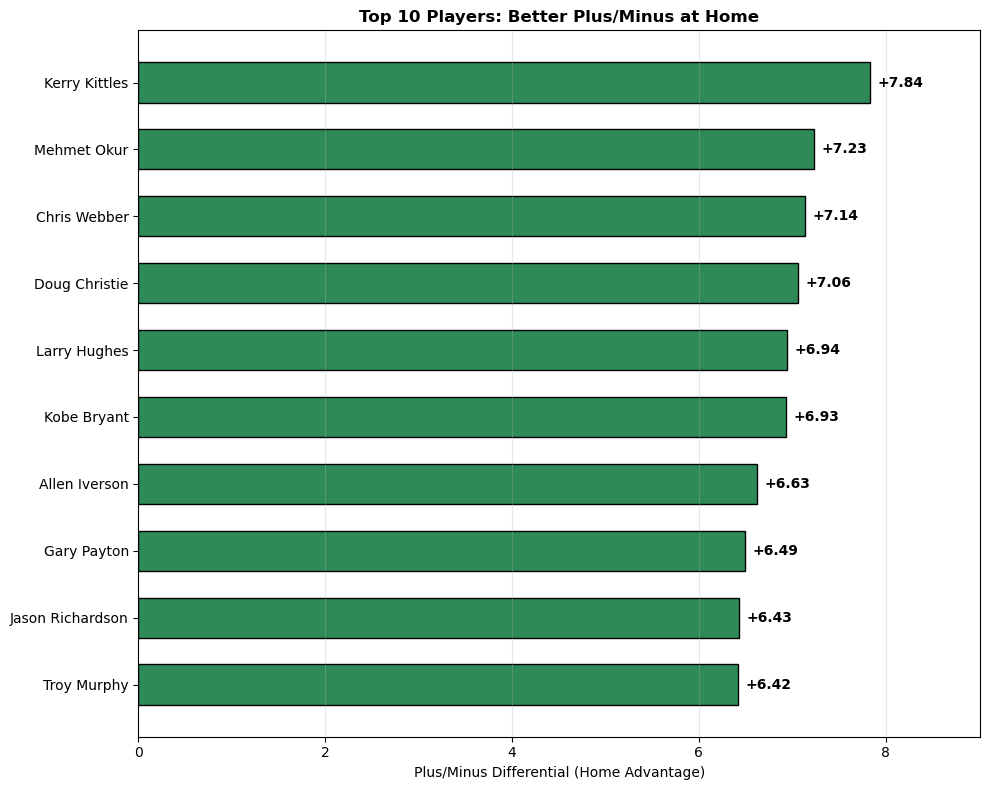

In [319]:
## Chart for top 10 away performers
create_bar_chart_horizontal(
    data = pm_top_10_away['plus_minus_diff'].values[::-1],
    labels = pm_top_10_away['player'].values[::-1],
    title = 'Top 10 Players: Better Plus/Minus on the Road',
    xlabel = 'Plus/Minus Differential',
    colors = [red] * 10,
    value_format = '+{:.2f}'
)

## Chart for top 10 home performers
create_bar_chart_horizontal(
    data = abs(pm_top_10_home['plus_minus_diff'].values[::-1]), ## absolute value to show positive
    labels = pm_top_10_home['player'].values[::-1],
    title = 'Top 10 Players: Better Plus/Minus at Home',
    xlabel = 'Plus/Minus Differential (Home Advantage)',
    colors = [green] * 10,
    value_format = '+{:.2f}'
)

In [320]:
## Get plus/minus differentials for 'legends'
## We define 'legends' as players who have played more than 1000 games
pm_diffs = calculate_stat_differentials(df_player_details, 'PLUS_MINUS', min_games=1000)

## Top 10 players with better plus/minus on the road (positive differential)
## Apparently, there are no 'legends' who have better plus/minus when playing on the road
pm_legends_top_10_away = pm_diffs[pm_diffs['plus_minus_diff'] > 0].sort_values('plus_minus_diff', ascending=False).head(10)

## Top 10 players with better plus/minus at home (negative differential)
pm_legends_top_10_home = pm_diffs[pm_diffs['plus_minus_diff'] < 0].sort_values('plus_minus_diff').head(10)

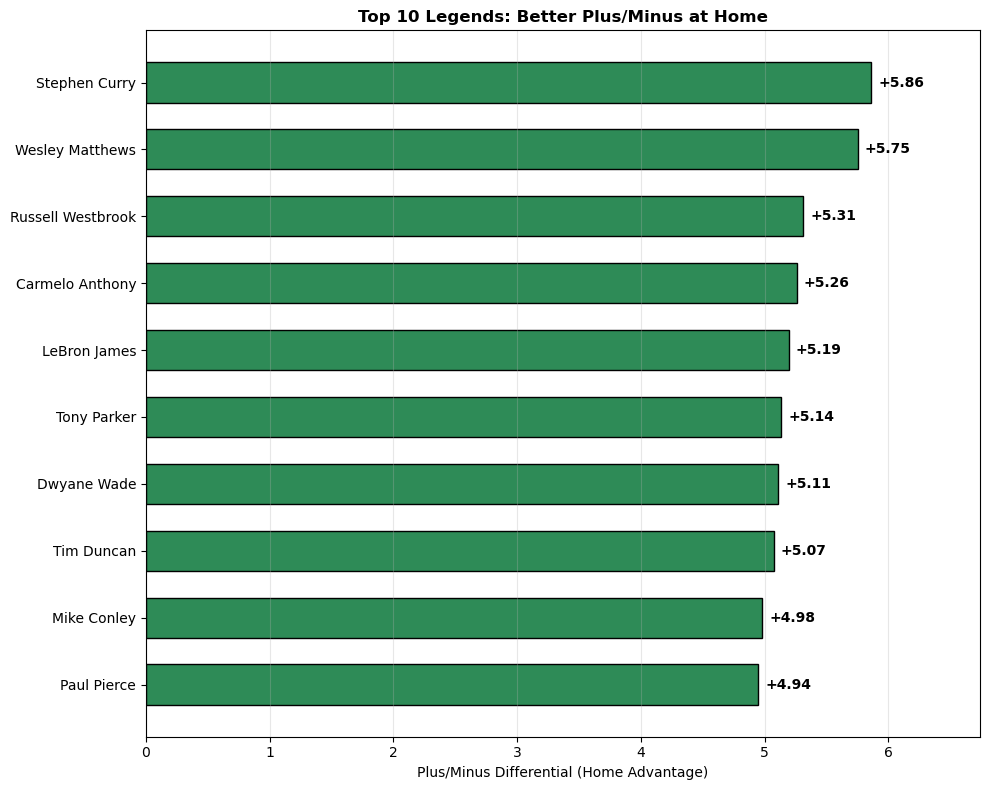

In [321]:
## Chart for legends top 10 home performers
create_bar_chart_horizontal(
    data=abs(pm_legends_top_10_home['plus_minus_diff'].values)[::-1],
    labels=pm_legends_top_10_home['player'].values[::-1],
    title='Top 10 Legends: Better Plus/Minus at Home',
    xlabel='Plus/Minus Differential (Home Advantage)',
    colors=[green] * 10,
    value_format='+{:.2f}'
)

### **3.2.2. Scoring Difference**

In [322]:
## Get scoring differentials
scoring_diffs = calculate_stat_differentials(df_player_details, 'PTS', min_games=100)

## Top 10 players with better scoring on the road (positive differential)
scoring_top_10_away = scoring_diffs[scoring_diffs['pts_diff'] > 0].sort_values('pts_diff', ascending=False).head(10)

## Top 10 players with better scoring at home (negative differential)
scoring_top_10_home = scoring_diffs[scoring_diffs['pts_diff'] < 0].sort_values('pts_diff').head(10)

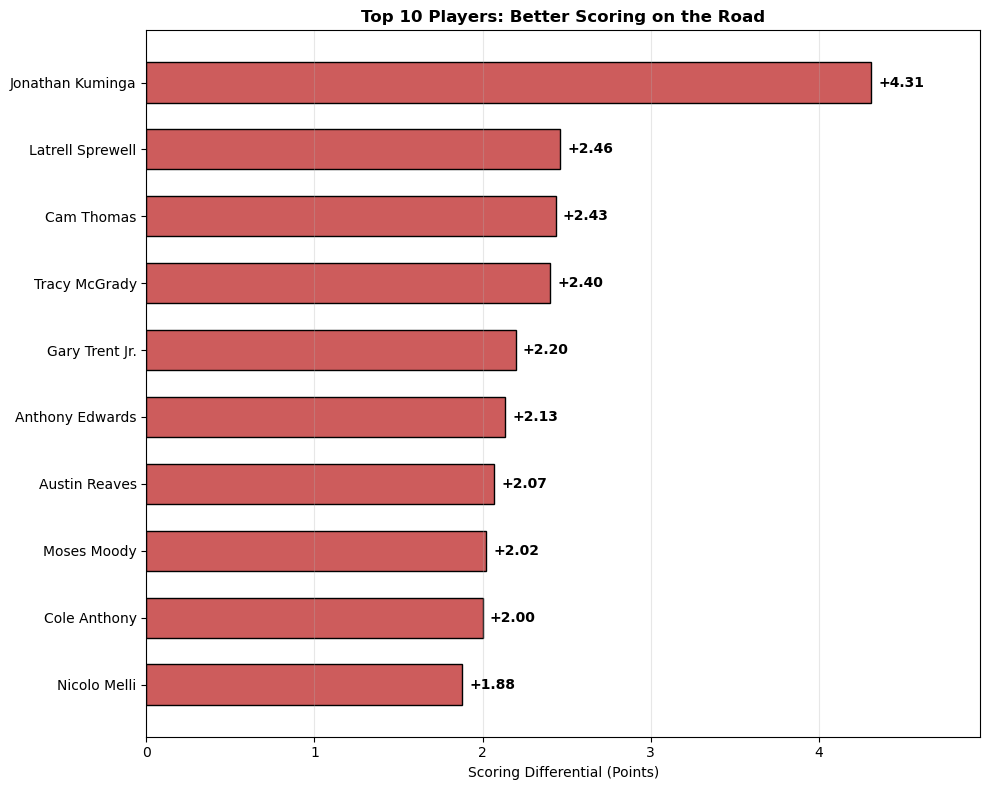

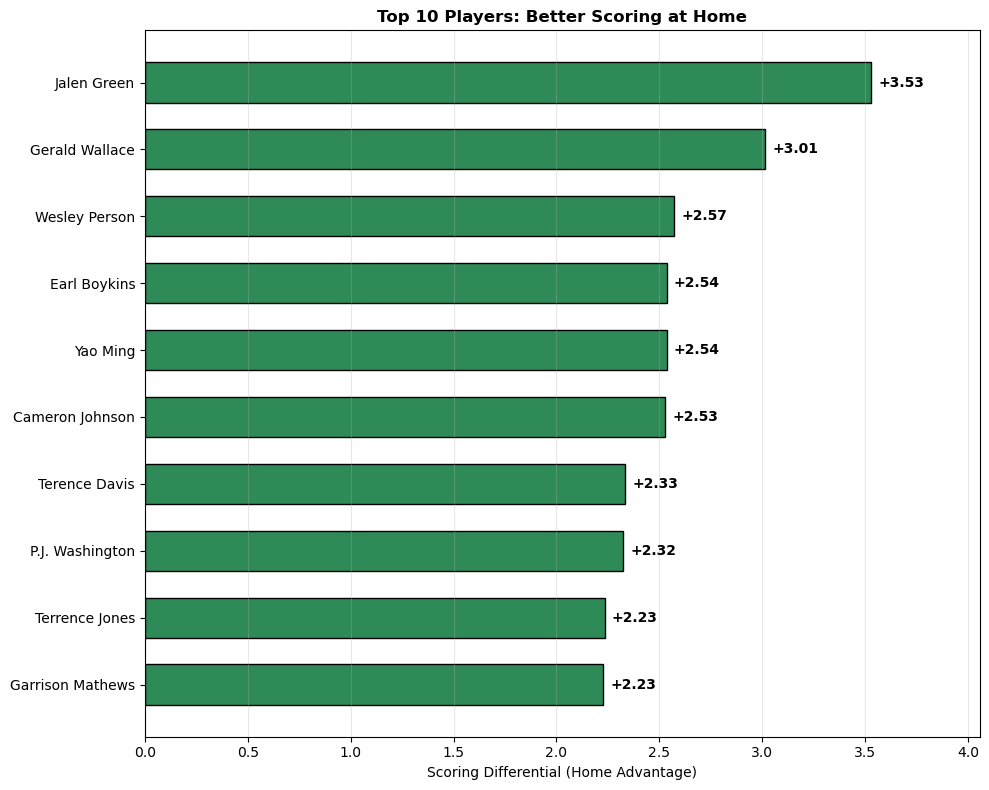

In [323]:
## Chart for top 10 away performers
create_bar_chart_horizontal(
    data=scoring_top_10_away['pts_diff'].values[::-1],
    labels=scoring_top_10_away['player'].values[::-1],
    title='Top 10 Players: Better Scoring on the Road',
    xlabel='Scoring Differential (Points)',
    colors=[red] * 10,
    value_format='+{:.2f}'
)

## Chart for top 10 home performers
create_bar_chart_horizontal(
    data=abs(scoring_top_10_home['pts_diff'].values[::-1]),
    labels=scoring_top_10_home['player'].values[::-1],
    title='Top 10 Players: Better Scoring at Home',
    xlabel='Scoring Differential (Home Advantage)',
    colors=[green] * 10,
    value_format='+{:.2f}'
)

In [324]:
## Get scoring differentials
## This time for high scoring individuals or players who average > 20 points
high_scoring_diffs = calculate_stat_differentials(df_player_details, 'PTS', min_games=100, min_stat_value=20)

## Top 10 players with better scoring on the road (positive differential)
high_scoring_top_10_away = high_scoring_diffs[high_scoring_diffs['pts_diff'] > 0].sort_values('pts_diff', ascending=False).head(10)

# Top 10 players with better scoring at home (negative differential)
high_scoring_top_10_home = high_scoring_diffs[high_scoring_diffs['pts_diff'] < 0].sort_values('pts_diff').head(10)

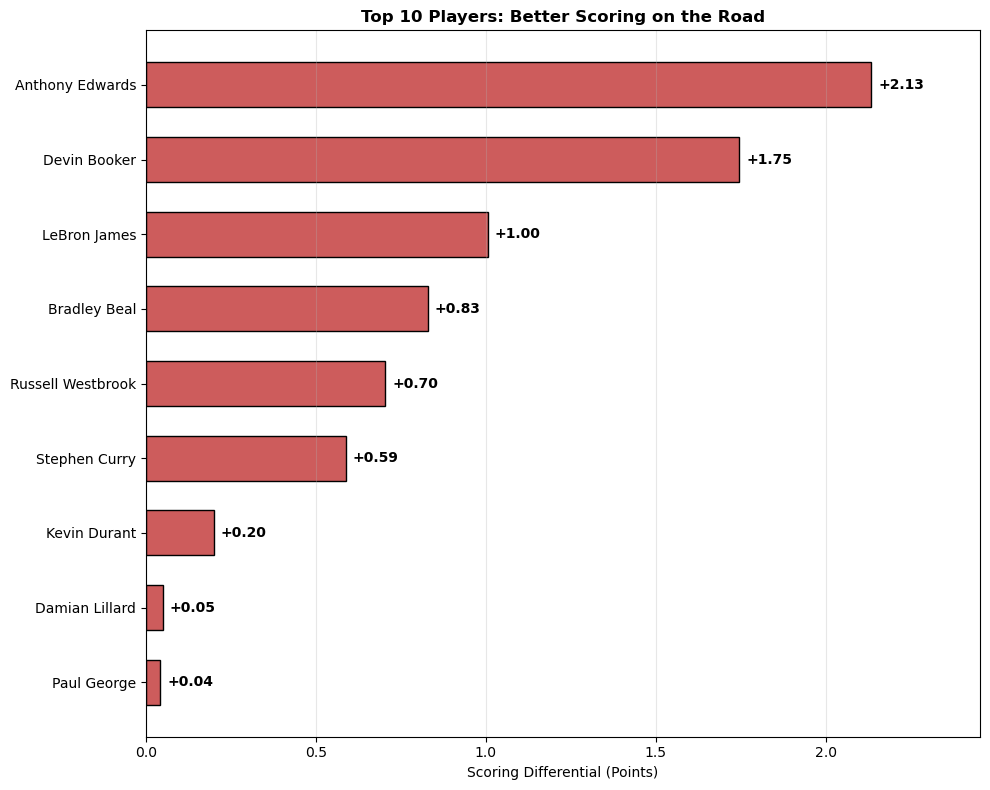

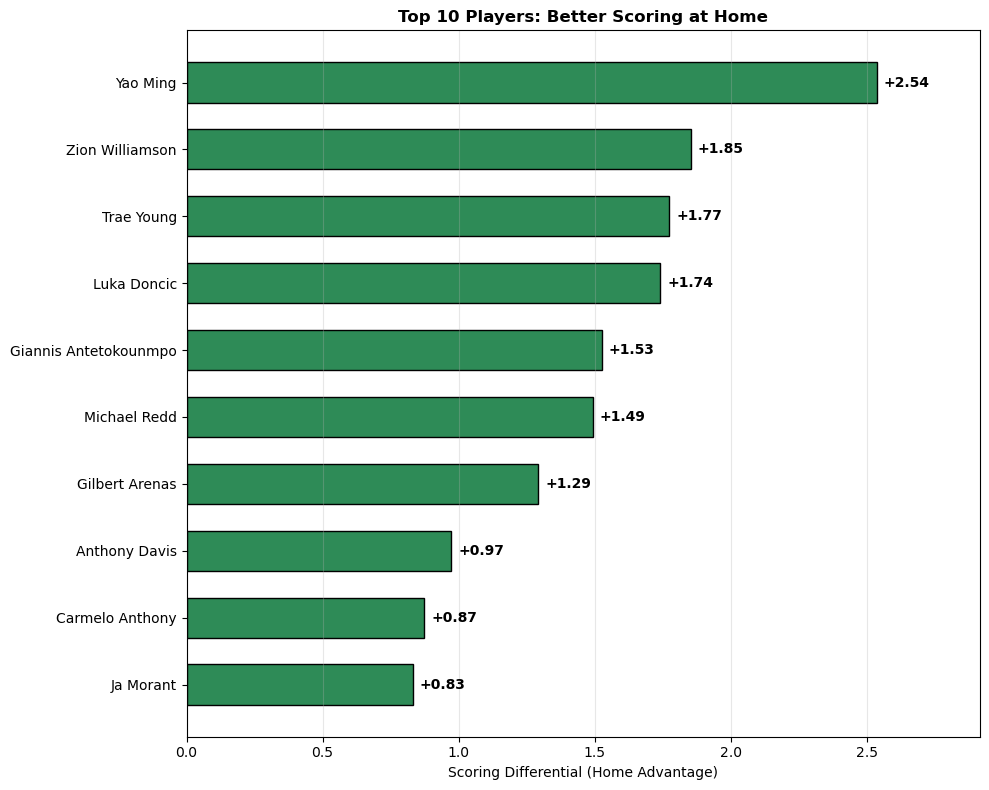

In [325]:
## Chart for top 10 away performers
create_bar_chart_horizontal(
    data=high_scoring_top_10_away['pts_diff'].values[::-1],
    labels=high_scoring_top_10_away['player'].values[::-1],
    title='Top 10 Players: Better Scoring on the Road',
    xlabel='Scoring Differential (Points)',
    colors=[red] * 10,
    value_format='+{:.2f}'
)

## Chart for top 10 home performers
create_bar_chart_horizontal(
    data=abs(high_scoring_top_10_home['pts_diff'].values[::-1]),
    labels=high_scoring_top_10_home['player'].values[::-1],
    title='Top 10 Players: Better Scoring at Home',
    xlabel='Scoring Differential (Home Advantage)',
    colors=[green] * 10,
    value_format='+{:.2f}'
)

### **3.2.3. Free Throw Attempts Difference**

In [326]:
# Get FTA differentials
fta_diffs = calculate_stat_differentials(df_player_details, 'FTA', min_games=100)

# Top 10 players with higher free throw attempts on the road (positive differential)
fta_top_10_away = fta_diffs [fta_diffs ['fta_diff'] > 0].sort_values('fta_diff', ascending=False).head(10)

# Top 10 players with higher free throw attempts at home (negative differential)
fta_top_10_home = fta_diffs [fta_diffs ['fta_diff'] < 0].sort_values('fta_diff').head(10)

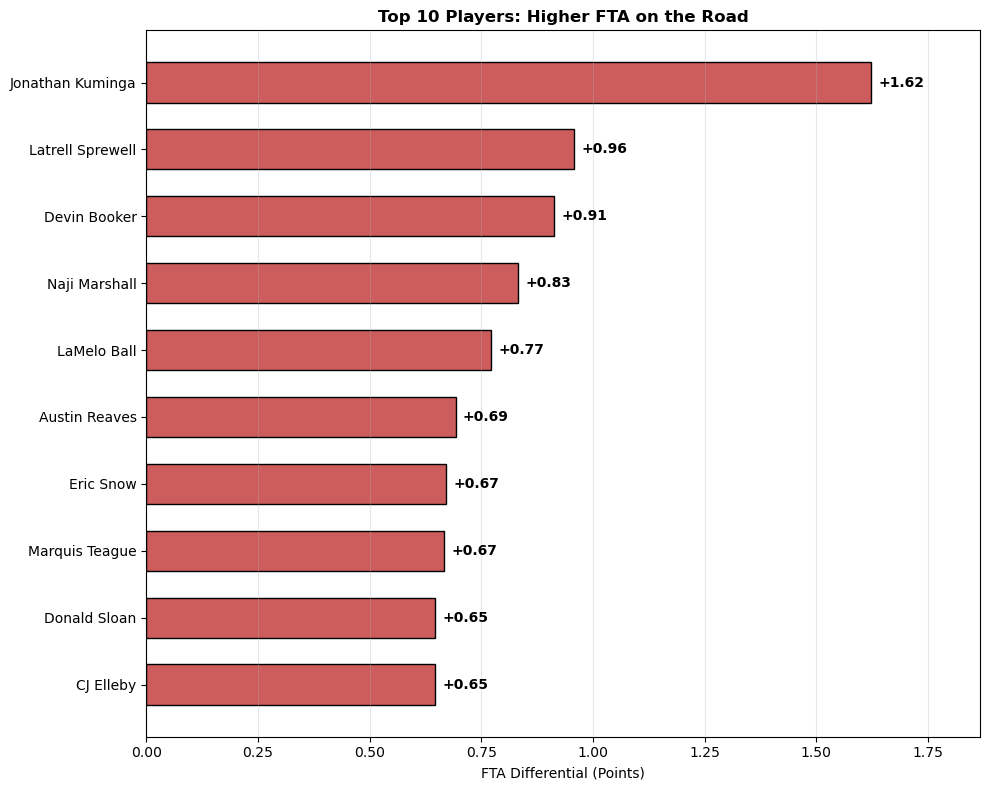

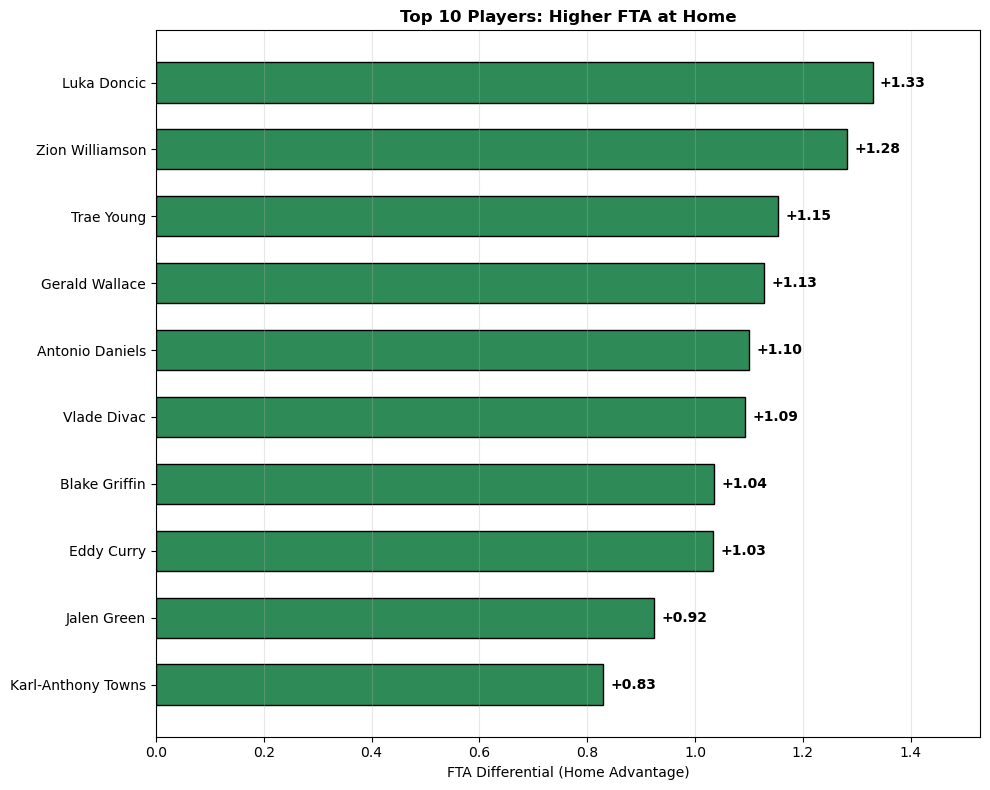

In [327]:
## Chart for top 10 away performers
create_bar_chart_horizontal(
    data=fta_top_10_away['fta_diff'].values[::-1],
    labels=fta_top_10_away['player'].values[::-1],
    title='Top 10 Players: Higher FTA on the Road',
    xlabel='FTA Differential (Points)',
    colors=[red] * 10,
    value_format='+{:.2f}'
)

## Chart for top 10 home performers
create_bar_chart_horizontal(
    data=abs(fta_top_10_home['fta_diff'].values[::-1]),
    labels=fta_top_10_home['player'].values[::-1],
    title='Top 10 Players: Higher FTA at Home',
    xlabel='FTA Differential (Home Advantage)',
    colors=[green] * 10,
    value_format='+{:.2f}'
)

## 4.0 Statistical Analysis: T-tests for Home-Court Advantage

In this section we formally test whether home teams and home performances differ from away using statistical hypothesis testing.

**Approach summary**

Team-level analysis: We'll use paired t-tests comparing each game's home-team metric vs away-team metric. These are paired because they come from the same game context (same opponents, same day, etc.), making paired tests more appropriate.

Player-level analysis: For individual players with sufficient sample size, we'll compute each qualified player's mean stat at home and mean stat away, then run a paired t-test across players. This tests whether players systematically perform differently at home versus on the road.

Significance level: We'll use α = 0.05 (standard 5% significance level). If p-value < 0.05, we reject the null hypothesis (no difference) and conclude there is statistically significant evidence of home-court advantage.

### **4.1 Team-Level Statistical Tests**

In [328]:
## Import statistical libraries
from scipy import stats
import numpy as np

In [329]:
## Function to perform paired t-test and print results
def perform_paired_ttest(home_data, away_data, metric_name):
    """
    Perform paired t-test between home and away data.
    
    Parameters:
    home_data: array-like of home team metrics
    away_data: array-like of away team metrics (paired with home_data)
    metric_name: string name of the metric being tested
    
    Returns:
    t_stat: t-statistic from the test
    p_val: p-value from the test
    """
    # Convert to numpy arrays for statistical testing
    home_array = np.array(home_data)
    away_array = np.array(away_data)
    
    # Check that we have the same number of observations
    if len(home_array) != len(away_array):
        print(f"Warning: Unequal sample sizes for {metric_name}")
        # Use unpaired t-test if samples aren't paired properly
        t_stat, p_val = stats.ttest_ind(home_array, away_array, equal_var=False)
    else:
        # Perform paired t-test (more appropriate for same-game comparisons)
        t_stat, p_val = stats.ttest_rel(home_array, away_array)
    
    # Print results
    print(f"\n=== {metric_name} ===")
    print(f"Home Mean: {home_array.mean():.3f}")
    print(f"Away Mean: {away_array.mean():.3f}")
    print(f"Mean Difference (Home - Away): {home_array.mean() - away_array.mean():.3f}")
    print(f"t-statistic: {t_stat:.3f}")
    print(f"p-value: {p_val:.6f}")
    
    # Interpret significance
    if p_val < 0.05:
        print(f"Result: Statistically significant difference (p < 0.05)")
        if home_array.mean() > away_array.mean():
            print(f"Conclusion: Home teams have significantly higher {metric_name}")
        else:
            print(f"Conclusion: Away teams have significantly higher {metric_name}")
    else:
        print(f"Result: No statistically significant difference (p ≥ 0.05)")
        print(f"Conclusion: No evidence that home court affects {metric_name}")
    
    return t_stat, p_val

#### **4.1.1 Test 1: Points Scored**

In [330]:
## Perform t-test for points scored
points_t_stat, points_p_val = perform_paired_ttest(
    home_data=df_games['PTS_home'],
    away_data=df_games['PTS_away'],
    metric_name="Points per Game"
)


=== Points per Game ===
Home Mean: 103.693
Away Mean: 100.860
Mean Difference (Home - Away): 2.833
t-statistic: 33.514
p-value: 0.000000
Result: Statistically significant difference (p < 0.05)
Conclusion: Home teams have significantly higher Points per Game


#### **Test 2: Field Goal Percentage**

In [331]:
## Perform t-test for field goal percentage
fg_pct_t_stat, fg_pct_p_val = perform_paired_ttest(
    home_data=df_games['FG_PCT_home'],
    away_data=df_games['FG_PCT_away'],
    metric_name="Field Goal Percentage"
)


=== Field Goal Percentage ===
Home Mean: 0.461
Away Mean: 0.450
Mean Difference (Home - Away): 0.011
t-statistic: 22.591
p-value: 0.000000
Result: Statistically significant difference (p < 0.05)
Conclusion: Home teams have significantly higher Field Goal Percentage


#### **Test 3: Three-Point Percentage**

In [332]:
## Perform t-test for three-point percentage
fg3_pct_t_stat, fg3_pct_p_val = perform_paired_ttest(
    home_data=df_games['FG3_PCT_home'],
    away_data=df_games['FG3_PCT_away'],
    metric_name="Three-Point Percentage"
)


=== Three-Point Percentage ===
Home Mean: 0.357
Away Mean: 0.350
Mean Difference (Home - Away): 0.006
t-statistic: 6.690
p-value: 0.000000
Result: Statistically significant difference (p < 0.05)
Conclusion: Home teams have significantly higher Three-Point Percentage


#### **4.1.4 Test 4: Free Throw Percentage**

In [333]:
## Perform t-test for free throw percentage
ft_pct_t_stat, ft_pct_p_val = perform_paired_ttest(
    home_data=df_games['FT_PCT_home'],
    away_data=df_games['FT_PCT_away'],
    metric_name="Free Throw Percentage"
)


=== Free Throw Percentage ===
Home Mean: 0.762
Away Mean: 0.760
Mean Difference (Home - Away): 0.002
t-statistic: 1.826
p-value: 0.067852
Result: No statistically significant difference (p ≥ 0.05)
Conclusion: No evidence that home court affects Free Throw Percentage


#### **4.1.5 Test 5: Assists**

In [334]:
## Perform t-test for assists
ast_t_stat, ast_p_val = perform_paired_ttest(
    home_data=df_games['AST_home'],
    away_data=df_games['AST_away'],
    metric_name="Assists per Game"
)


=== Assists per Game ===
Home Mean: 22.887
Away Mean: 21.562
Mean Difference (Home - Away): 1.325
t-statistic: 31.260
p-value: 0.000000
Result: Statistically significant difference (p < 0.05)
Conclusion: Home teams have significantly higher Assists per Game


#### **4.1.6 Test 6: Rebounds**

In [335]:
## Perform t-test for rebounds
reb_t_stat, reb_p_val = perform_paired_ttest(
    home_data=df_games['REB_home'],
    away_data=df_games['REB_away'],
    metric_name="Rebounds per Game"
)


=== Rebounds per Game ===
Home Mean: 43.418
Away Mean: 42.141
Mean Difference (Home - Away): 1.278
t-statistic: 22.735
p-value: 0.000000
Result: Statistically significant difference (p < 0.05)
Conclusion: Home teams have significantly higher Rebounds per Game


#### **4.1.7 Test 7: Free Throw Attempts (FTA)**

In [336]:
## Perform t-test for free throw attempts
## Note: We need to handle NaN values first
fta_home_clean = df_games['FTA_home'].dropna()
fta_away_clean = df_games['FTA_away'].dropna()

# Since FTA_home and FTA_away might have different NaN patterns,
# we need to align them properly for a paired test
# Let's get the common GAME_IDs with non-NaN values for both
valid_fta_games = df_games.dropna(subset=['FTA_home', 'FTA_away'])

fta_t_stat, fta_p_val = perform_paired_ttest(
    home_data=valid_fta_games['FTA_home'],
    away_data=valid_fta_games['FTA_away'],
    metric_name="Free Throw Attempts per Game"
)


=== Free Throw Attempts per Game ===
Home Mean: 24.394
Away Mean: 23.348
Mean Difference (Home - Away): 1.046
t-statistic: 17.700
p-value: 0.000000
Result: Statistically significant difference (p < 0.05)
Conclusion: Home teams have significantly higher Free Throw Attempts per Game


#### **4.1.8 Test 8: Win/Loss Binary Outcome**
For win/loss, we need a different test since it's a binary outcome. We'll use a proportion test.

In [337]:
## Test for win percentage difference
print("\n=== Win Percentage Analysis ===")

# Calculate win percentages
home_wins = df_games['HOME_TEAM_WINS'].sum()
total_games = len(df_games)
away_wins = total_games - home_wins

home_win_pct = (home_wins / total_games) * 100
away_win_pct = (away_wins / total_games) * 100

print(f"Home Win Percentage: {home_win_pct:.2f}%")
print(f"Away Win Percentage: {away_win_pct:.2f}%")
print(f"Difference: {home_win_pct - away_win_pct:.2f} percentage points")

# Perform proportion z-test
from statsmodels.stats.proportion import proportions_ztest

# Create arrays: home wins and away wins
count = np.array([home_wins, away_wins])
nobs = np.array([total_games, total_games])

# Perform two-proportion z-test
z_stat, p_val = proportions_ztest(count, nobs, alternative='larger')

print(f"\nProportion z-test for Home Win Advantage:")
print(f"z-statistic: {z_stat:.3f}")
print(f"p-value: {p_val:.6f}")

if p_val < 0.05:
    print("Result: Statistically significant home win advantage (p < 0.05)")
    print("Conclusion: Home teams win significantly more often than away teams")
else:
    print("Result: No statistically significant home win advantage (p ≥ 0.05)")
    print("Conclusion: No evidence that home court affects win probability")


=== Win Percentage Analysis ===
Home Win Percentage: 58.92%
Away Win Percentage: 41.08%
Difference: 17.85 percentage points

Proportion z-test for Home Win Advantage:
z-statistic: 40.381
p-value: 0.000000
Result: Statistically significant home win advantage (p < 0.05)
Conclusion: Home teams win significantly more often than away teams


#### **4.1.9 Summary of Team-Level Results**

In [338]:
## Create summary dataframe for team-level results
team_results_summary = pd.DataFrame({
    'Metric': ['Points', 'FG%', '3P%', 'FT%', 'Assists', 'Rebounds', 'FTA', 'Win%'],
    'Home_Mean': [
        df_games['PTS_home'].mean(),
        df_games['FG_PCT_home'].mean(),
        df_games['FG3_PCT_home'].mean(),
        df_games['FT_PCT_home'].mean(),
        df_games['AST_home'].mean(),
        df_games['REB_home'].mean(),
        valid_fta_games['FTA_home'].mean(),
        home_win_pct
    ],
    'Away_Mean': [
        df_games['PTS_away'].mean(),
        df_games['FG_PCT_away'].mean(),
        df_games['FG3_PCT_away'].mean(),
        df_games['FT_PCT_away'].mean(),
        df_games['AST_away'].mean(),
        df_games['REB_away'].mean(),
        valid_fta_games['FTA_away'].mean(),
        away_win_pct
    ],
    'Difference': [
        df_games['PTS_home'].mean() - df_games['PTS_away'].mean(),
        df_games['FG_PCT_home'].mean() - df_games['FG_PCT_away'].mean(),
        df_games['FG3_PCT_home'].mean() - df_games['FG3_PCT_away'].mean(),
        df_games['FT_PCT_home'].mean() - df_games['FT_PCT_away'].mean(),
        df_games['AST_home'].mean() - df_games['AST_away'].mean(),
        df_games['REB_home'].mean() - df_games['REB_away'].mean(),
        valid_fta_games['FTA_home'].mean() - valid_fta_games['FTA_away'].mean(),
        home_win_pct - away_win_pct
    ],
    't_stat/z_stat': [points_t_stat, fg_pct_t_stat, fg3_pct_t_stat, ft_pct_t_stat, 
                     ast_t_stat, reb_t_stat, fta_t_stat, z_stat],
    'p_value': [points_p_val, fg_pct_p_val, fg3_pct_p_val, ft_pct_p_val, 
                ast_p_val, reb_p_val, fta_p_val, p_val],
    'Significant': [
        points_p_val < 0.05, fg_pct_p_val < 0.05, fg3_pct_p_val < 0.05, 
        ft_pct_p_val < 0.05, ast_p_val < 0.05, reb_p_val < 0.05, 
        fta_p_val < 0.05, p_val < 0.05
    ]
})

print("\n" + "="*80)
print("TEAM-LEVEL HOME-COURT ADVANTAGE STATISTICAL SUMMARY")
print("="*80)
print(team_results_summary.to_string(index=False))

# Visualize significance
print("\n\nSIGNIFICANCE SUMMARY:")
print("-" * 40)
for idx, row in team_results_summary.iterrows():
    sig_symbol = "✓" if row['Significant'] else "✗"
    direction = "Home advantage" if row['Difference'] > 0 else "Away advantage"
    print(f"{sig_symbol} {row['Metric']}: {direction} ({row['Difference']:.3f}), p = {row['p_value']:.6f}")


TEAM-LEVEL HOME-COURT ADVANTAGE STATISTICAL SUMMARY
  Metric  Home_Mean  Away_Mean  Difference  t_stat/z_stat       p_value  Significant
  Points 103.693170 100.860006    2.833164      33.513541 4.956084e-241         True
     FG%   0.461354   0.450409    0.010945      22.590553 6.674571e-112         True
     3P%   0.356560   0.350069    0.006491       6.690097  2.276209e-11         True
     FT%   0.761553   0.759931    0.001621       1.826064  6.785232e-02        False
 Assists  22.887005  21.562358    1.324646      31.260225 1.475101e-210         True
Rebounds  43.418457  42.140580    1.277878      22.735171 2.668957e-113         True
     FTA  24.393920  23.348128    1.045792      17.699812  1.095523e-69         True
    Win%  58.923967  41.076033   17.847933      40.380530  0.000000e+00         True


SIGNIFICANCE SUMMARY:
----------------------------------------
✓ Points: Home advantage (2.833), p = 0.000000
✓ FG%: Home advantage (0.011), p = 0.000000
✓ 3P%: Home advantage (0.0

### **4.2 Player-Level Statistical Tests**
Now let's examine whether individual players perform differently at home versus away. We'll focus on key metrics for players who have played a minimum number of games both home and away.

#### **4.2.1 Prepare Player Data for Analysis**

In [339]:
## First, let's identify players with sufficient sample size
print("Analyzing player performance differences between home and away games...")

# Count home and away games per player
player_home_counts = df_player_details[df_player_details['IS_HOME']].groupby('PLAYER_ID').size()
player_away_counts = df_player_details[~df_player_details['IS_HOME']].groupby('PLAYER_ID').size()

# Convert to dataframes
home_counts_df = player_home_counts.reset_index()
home_counts_df.columns = ['PLAYER_ID', 'HOME_GAMES']

away_counts_df = player_away_counts.reset_index()
away_counts_df.columns = ['PLAYER_ID', 'AWAY_GAMES']

# Merge the counts
player_game_counts = pd.merge(home_counts_df, away_counts_df, on='PLAYER_ID', how='inner')

# Set minimum games threshold (e.g., at least 20 home AND 20 away games)
MIN_GAMES = 20
qualified_players = player_game_counts[
    (player_game_counts['HOME_GAMES'] >= MIN_GAMES) & 
    (player_game_counts['AWAY_GAMES'] >= MIN_GAMES)
]

print(f"Total players in dataset: {len(df_player_details['PLAYER_ID'].unique())}")
print(f"Players with ≥{MIN_GAMES} home AND away games: {len(qualified_players)}")

# Get player names for the qualified players
player_names = df_player_details[['PLAYER_ID', 'PLAYER_NAME']].drop_duplicates()
qualified_players = pd.merge(qualified_players, player_names, on='PLAYER_ID')

print(f"\nSample of qualified players:")
print(qualified_players.head(10).to_string(index=False))

Analyzing player performance differences between home and away games...
Total players in dataset: 2310
Players with ≥20 home AND away games: 1458

Sample of qualified players:
 PLAYER_ID  HOME_GAMES  AWAY_GAMES      PLAYER_NAME
        15          94          93  Eric Piatkowski
        56         181         181      Gary Payton
        57          79          81    Doug Christie
        72          45          46   Kenny Anderson
        77          33          28     Doug Overton
        84          91          89 Latrell Sprewell
        87         177         180  Dikembe Mutombo
        89          84          85    Nick Van Exel
       109         208         203     Robert Horry
       120          62          67     Steven Smith


#### **4.2.2 Function to Calculate Player Home/Away Averages**

In [340]:
def calculate_player_home_away_stats(player_df, player_id, stat_columns):
    """
    Calculate home and away averages for a specific player.
    
    Parameters:
    player_df: DataFrame containing player game data
    player_id: ID of the player to analyze
    stat_columns: list of statistical columns to calculate
    
    Returns:
    Dictionary with home and away averages for each stat
    """
    # Filter for this player
    player_data = player_df[player_df['PLAYER_ID'] == player_id].copy()
    
    # Separate home and away games
    home_games = player_data[player_data['IS_HOME']]
    away_games = player_data[~player_data['IS_HOME']]
    
    results = {'PLAYER_ID': player_id}
    
    # Calculate means for each stat
    for stat in stat_columns:
        home_mean = home_games[stat].mean() if len(home_games) > 0 else np.nan
        away_mean = away_games[stat].mean() if len(away_games) > 0 else np.nan
        difference = home_mean - away_mean if not np.isnan(home_mean) and not np.isnan(away_mean) else np.nan
        
        results[f'{stat}_HOME'] = home_mean
        results[f'{stat}_AWAY'] = away_mean
        results[f'{stat}_DIFF'] = difference
    
    # Add player name if available
    if 'PLAYER_NAME' in player_data.columns:
        results['PLAYER_NAME'] = player_data['PLAYER_NAME'].iloc[0]
    
    return results

#### **4.2.3 Calculate Home/Away Stats for All Qualified Players**

In [341]:
## Define key statistics to analyze
key_stats = ['PTS', 'REB', 'AST', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'PLUS_MINUS']

print(f"\nCalculating home/away averages for {len(qualified_players)} qualified players...")
print(f"Key statistics: {', '.join(key_stats)}")

# Calculate stats for each qualified player
player_stats_list = []

for player_id in qualified_players['PLAYER_ID']:
    try:
        player_stats = calculate_player_home_away_stats(df_player_details, player_id, key_stats)
        player_stats_list.append(player_stats)
    except Exception as e:
        # Skip players with calculation errors
        continue

# Convert to DataFrame
player_stats_df = pd.DataFrame(player_stats_list)

print(f"\nPlayer stats calculated for {len(player_stats_df)} players")
print(f"Sample of player home/away differences:")
print(player_stats_df[['PLAYER_NAME', 'PTS_HOME', 'PTS_AWAY', 'PTS_DIFF']].head(10).to_string(index=False))


Calculating home/away averages for 1464 qualified players...
Key statistics: PTS, REB, AST, FG_PCT, FG3_PCT, FT_PCT, PLUS_MINUS

Player stats calculated for 1464 players
Sample of player home/away differences:
     PLAYER_NAME  PTS_HOME  PTS_AWAY  PTS_DIFF
 Eric Piatkowski  3.670213  3.655914  0.014299
     Gary Payton  9.657459  9.303867  0.353591
   Doug Christie  9.012658  8.259259  0.753399
  Kenny Anderson  5.400000  4.913043  0.486957
    Doug Overton  3.727273  3.607143  0.120130
Latrell Sprewell 14.076923 16.539326 -2.462403
 Dikembe Mutombo  3.689266  3.477778  0.211488
   Nick Van Exel  8.214286  9.023529 -0.809244
    Robert Horry  4.802885  4.802956 -0.000071
    Steven Smith  5.693548  5.238806  0.454742


#### **4.2.4 Perform Paired T-tests for Each Statistic Across Players**

In [342]:
print("\n" + "="*80)
print("PLAYER-LEVEL HOME-COURT ADVANTAGE STATISTICAL TESTS")
print("="*80)

# Store results
player_test_results = []

for stat in key_stats:
    # Extract home and away means for this stat
    home_means = player_stats_df[f'{stat}_HOME'].dropna()
    away_means = player_stats_df[f'{stat}_AWAY'].dropna()
    
    # Align the data (some players might have NaN for certain stats)
    # We'll use only players with both home and away values
    valid_indices = home_means.index.intersection(away_means.index)
    home_valid = home_means.loc[valid_indices]
    away_valid = away_means.loc[valid_indices]
    
    # Skip if insufficient data
    if len(home_valid) < 30:  # Need reasonable sample size
        print(f"\nInsufficient data for {stat}: only {len(home_valid)} players")
        continue
    
    # Perform paired t-test
    t_stat, p_val = stats.ttest_rel(home_valid, away_valid)
    
    # Calculate effect size (Cohen's d for paired samples)
    differences = home_valid - away_valid
    d = differences.mean() / differences.std() if differences.std() > 0 else 0
    
    # Store results
    player_test_results.append({
        'Statistic': stat,
        'Players_Tested': len(home_valid),
        'Home_Mean': home_valid.mean(),
        'Away_Mean': away_valid.mean(),
        'Mean_Difference': home_valid.mean() - away_valid.mean(),
        't_statistic': t_stat,
        'p_value': p_val,
        'Cohen_d': d,
        'Significant': p_val < 0.05
    })
    
    # Print results
    print(f"\n=== {stat} ===")
    print(f"Players analyzed: {len(home_valid)}")
    print(f"Home Mean: {home_valid.mean():.3f}")
    print(f"Away Mean: {away_valid.mean():.3f}")
    print(f"Difference (Home - Away): {home_valid.mean() - away_valid.mean():.3f}")
    print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.6f}")
    print(f"Effect size (Cohen's d): {d:.3f}")
    
    if p_val < 0.05:
        if home_valid.mean() > away_valid.mean():
            print(f"CONCLUSION: Players have significantly higher {stat} at home")
        else:
            print(f"CONCLUSION: Players have significantly higher {stat} away")
    else:
        print(f"CONCLUSION: No significant difference in {stat} between home and away")

# Convert to DataFrame for summary
player_results_df = pd.DataFrame(player_test_results)

print("\n" + "="*80)
print("PLAYER-LEVEL RESULTS SUMMARY")
print("="*80)
print(player_results_df[['Statistic', 'Players_Tested', 'Mean_Difference', 
                         't_statistic', 'p_value', 'Significant']].to_string(index=False))


PLAYER-LEVEL HOME-COURT ADVANTAGE STATISTICAL TESTS

=== PTS ===
Players analyzed: 1464
Home Mean: 7.750
Away Mean: 7.625
Difference (Home - Away): 0.125
t-statistic: 5.713, p-value: 0.000000
Effect size (Cohen's d): 0.149
CONCLUSION: Players have significantly higher PTS at home

=== REB ===
Players analyzed: 1464
Home Mean: 3.407
Away Mean: 3.342
Difference (Home - Away): 0.065
t-statistic: 6.583, p-value: 0.000000
Effect size (Cohen's d): 0.172
CONCLUSION: Players have significantly higher REB at home

=== AST ===
Players analyzed: 1464
Home Mean: 1.705
Away Mean: 1.636
Difference (Home - Away): 0.069
t-statistic: 9.897, p-value: 0.000000
Effect size (Cohen's d): 0.259
CONCLUSION: Players have significantly higher AST at home

=== FG_PCT ===
Players analyzed: 1464
Home Mean: 0.394
Away Mean: 0.388
Difference (Home - Away): 0.006
t-statistic: 4.719, p-value: 0.000003
Effect size (Cohen's d): 0.123
CONCLUSION: Players have significantly higher FG_PCT at home

=== FG3_PCT ===
Players 

#### **4.2.5 Identify Top Players Most Affected by Home Court**